In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")
df.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0              0              0              1              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              0              1              0              0  ...   
4              0              1              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 59 columns]

In [3]:
df.shape

(595212, 59)

In [4]:
df.drop('id', axis=1, inplace=True)

In [5]:
df.head()

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0       0          2              2          5              1              0   
1       0          1              1          7              0              0   
2       0          5              4          9              1              0   
3       0          0              1          2              0              0   
4       0          0              2          0              1              0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ...  \
0              0              1              0              0  ...   
1              0              0              1              0  ...   
2              0              0              1              0  ...   
3              1              0              0              0  ...   
4              1              0              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 58 columns]

In [7]:
df[df['target'] == 1]

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
9            1          1              1          2              0   
19           1          0              1          2              1   
28           1          0              2          0              1   
39           1          2              1          3              1   
41           1          5              2          1              0   
...        ...        ...            ...        ...            ...   
595006       1          5              1          7              0   
595046       1          1              1          5              0   
595099       1          0              1          6              1   
595113       1          0              2          2              0   
595158       1          1              2          1              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
9                   0              0              1              0   
19                  0              1              0              0   
28                  4              1              0              0   
39                  0              0              0              1   
41                  0              0              0              1   
...               ...            ...            ...            ...   
595006              3              0              0              1   
595046              0              0              0              1   
595099              0              0              1              0   
595113              0              1              0              0   
595158              0              0              0              1   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
9                   0  ...           3           5           0           6   
19                  0  ...          10           3           1          11   
28                  0  ...           3           2           0           8   
39                  0  ...           6           0           8          14   
41                  0  ...           5           2           0           7   
...               ...  ...         ...         ...         ...         ...   
595006              0  ...          10           1           5           7   
595046              0  ...           9           2           1           5   
595099              0  ...           3           2           1           6   
595113              0  ...           5           0           4           4   
595158              0  ...           7           2           4           9   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
9                    0               1               0               0   
19                   0               1               1               0   
28                   0               1               1               0   
39                   0               1               0               1   
41                   1               1               0               0   
...                ...             ...             ...             ...   
595006               0               1               1               0   
595046               0               1               0               0   
595099               0               1               1               0   
595113               0               0               1               0   
595158               1               1               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
9                    1               0  
19                   1               0  
28                   0               0  
39                   0               0  
41                   0               0  
...                ...             ...  
595006               0               0  
595046               0               0  
595099               0               0  
595113               1               0  
595158               0               0  

[21694 

In [ ]:
Inferences :- Principle component analysis(PCA) can be applied to reduce the dimension of the features.

Also I reckon, binary features can be made to a single feature by applying binary addition /multiplication (combination technique).
Similar logic can be applied to categorical features as well.

In [6]:
df[df.duplicated()]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [7]:
df.columns  

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      

<AxesSubplot:>

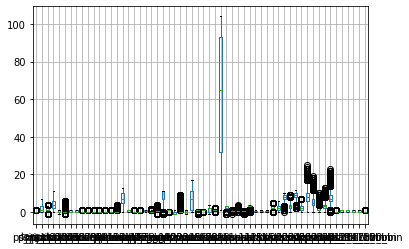

In [8]:
import matplotlib.pyplot as plt

df.boxplot()

In [ ]:
Inferences :- There are outliers in the datasets and that needed to be removed.

<AxesSubplot:>

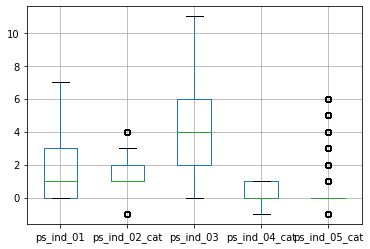

In [9]:
df[['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03','ps_ind_04_cat','ps_ind_05_cat']].boxplot()

<AxesSubplot:>

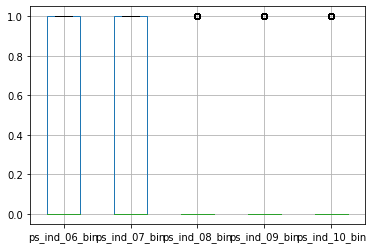

In [10]:
df[['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin']].boxplot()

<AxesSubplot:>

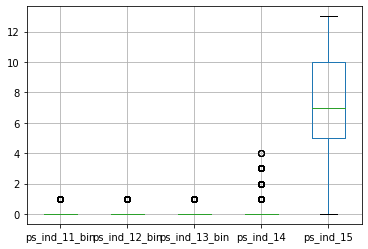

In [11]:
df[['ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin','ps_ind_14','ps_ind_15']].boxplot()

<AxesSubplot:>

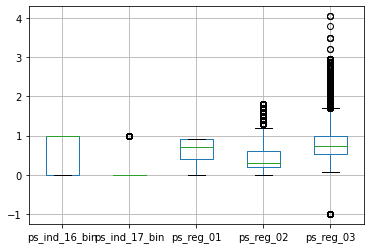

In [12]:
df[['ps_ind_16_bin', 'ps_ind_17_bin', 'ps_reg_01','ps_reg_02','ps_reg_03']].boxplot()

<AxesSubplot:>

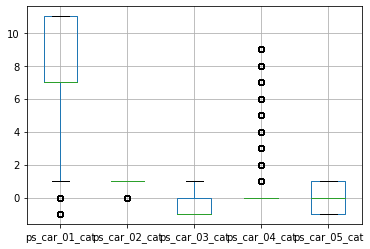

In [13]:
df[['ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat','ps_car_04_cat','ps_car_05_cat']].boxplot()

<AxesSubplot:>

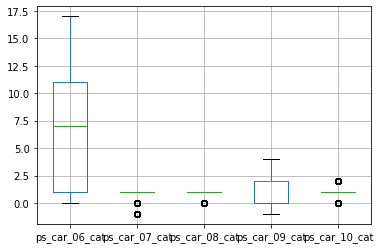

In [14]:
df[['ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat','ps_car_09_cat','ps_car_10_cat']].boxplot()

<AxesSubplot:>

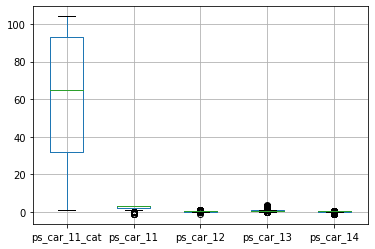

In [15]:
df[['ps_car_11_cat', 'ps_car_11', 'ps_car_12','ps_car_13','ps_car_14']].boxplot()

<AxesSubplot:>

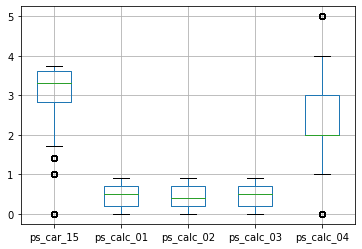

In [16]:
df[['ps_car_15', 'ps_calc_01', 'ps_calc_02','ps_calc_03','ps_calc_04']].boxplot()

<AxesSubplot:>

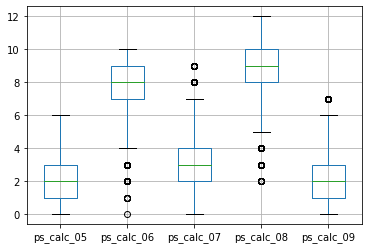

In [17]:
df[['ps_calc_05', 'ps_calc_06', 'ps_calc_07','ps_calc_08','ps_calc_09']].boxplot()

<AxesSubplot:>

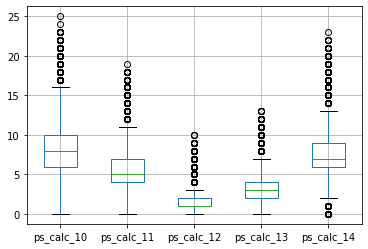

In [18]:
df[['ps_calc_10', 'ps_calc_11', 'ps_calc_12','ps_calc_13','ps_calc_14']].boxplot()

<AxesSubplot:>

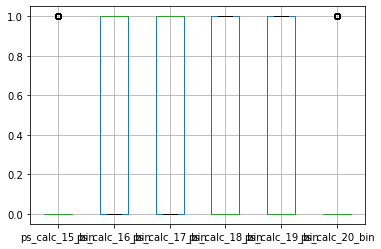

In [19]:
df[['ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']].boxplot()

In [20]:
Q1 = df['ps_ind_02_cat'].quantile(0.25)
Q3 = df['ps_ind_02_cat'].quantile(0.75)
IQR = Q3 - Q1
Outliers = df[(df.ps_ind_02_cat < (Q1 - 1.5 * IQR)) | (df.ps_ind_02_cat > (Q3 + 1.5 * IQR))]

In [21]:
Outliers

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
2            0          5              4          9              1   
37           0          3              4          9              1   
149          0          0              4          9              1   
190          0          3              4          7              1   
267          0          0              4          7              1   
...        ...        ...            ...        ...            ...   
594846       1          5              4         10              1   
594872       0          0              4          9              0   
594920       0          3              4          3              1   
594944       0          3              4          9              1   
594989       0          1              4          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
2                   0              0              0              1   
37                  0              0              0              0   
149                 0              0              1              0   
190                 0              0              0              0   
267                 0              0              1              0   
...               ...            ...            ...            ...   
594846              0              0              0              0   
594872              0              1              0              0   
594920              0              0              1              0   
594944              0              0              1              0   
594989              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
2                   0  ...           4           2           7           7   
37                  1  ...           4           1           1           7   
149                 0  ...           0           0           2          11   
190                 1  ...           2           1           1           5   
267                 0  ...           2           0           5           7   
...               ...  ...         ...         ...         ...         ...   
594846              1  ...           7           2           1           8   
594872              0  ...           9           1           1           6   
594920              0  ...           8           2           2           7   
594944              0  ...          11           1           3          11   
594989              0  ...           8           2           6          15   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
2                    0               1               1               0   
37                   0               0               1               1   
149                  0               1               1               1   
190                  0               1               1               0   
267                  0               0               1               0   
...                ...             ...             ...             ...   
594846               0               0               0               0   
594872               0               1               0               0   
594920               0               1               1               0   
594944               0               0               1               0   
594989               0               1               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
2                    1               0  
37                   0               0  
149                  0               0  
190                  0               1  
267                  0               0  
...                ...             ...  
594846               0               0  
594872               0               0  
594920               1               0  
594944               0               0  
594989               1               1  

[11594 

In [22]:
df.drop(Outliers.index, axis = 0, inplace =True)

<AxesSubplot:>

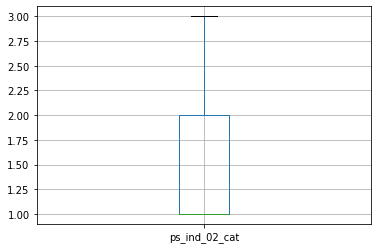

In [23]:
#Validating after removing outliers
df.boxplot(column = 'ps_ind_02_cat')

In [24]:
Q1 = df['ps_ind_05_cat'].quantile(0.25)
Q3 = df['ps_ind_05_cat'].quantile(0.75)
IQR = Q3 - Q1
Outliers2 = df[(df.ps_ind_05_cat < (Q1 - 1.5 * IQR)) | (df.ps_ind_05_cat > (Q3 + 1.5 * IQR))]

In [25]:
Outliers2

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
17           0          5              1          6              0   
21           0          0              1          5              1   
22           0          5              3          6              1   
28           1          0              2          0              1   
31           0          1              1          2              1   
...        ...        ...            ...        ...            ...   
595150       0          0              1          0              0   
595181       0          1              1          7              0   
595187       0          0              1          7              0   
595193       0          0              2          0              0   
595200       0          1              1          1              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
17                  1              1              0              0   
21                  4              1              0              0   
22                  3              0              1              0   
28                  4              1              0              0   
31                  6              0              0              1   
...               ...            ...            ...            ...   
595150              6              0              1              0   
595181              1              1              0              0   
595187              4              0              0              0   
595193             -1              0              1              0   
595200              3              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
17                  0  ...           9           1           3           9   
21                  0  ...           5           5           3           8   
22                  0  ...           8           1           3           5   
28                  0  ...           3           2           0           8   
31                  0  ...           7           1           2           3   
...               ...  ...         ...         ...         ...         ...   
595150              0  ...           5           2           4           5   
595181              0  ...           4           0           3           9   
595187              1  ...           5           1           4           9   
595193              0  ...           6           1           3           5   
595200              0  ...           2           3           3          12   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
17                   0               1               1               0   
21                   0               0               0               0   
22                   0               0               0               0   
28                   0               1               1               0   
31                   0               1               1               1   
...                ...             ...             ...             ...   
595150               0               0               0               1   
595181               0               1               1               0   
595187               0               1               1               0   
595193               0               1               0               1   
595200               0               0               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
17                   0               0  
21                   1               0  
22                   0               1  
28                   0               0  
31                   0               0  
...                ...             ...  
595150               0               1  
595181               0               0  
595187               0               1  
595193               0               0  
595200               0               0  

[65985 

In [26]:
df.drop(Outliers2.index, axis = 0, inplace =True)

<AxesSubplot:>

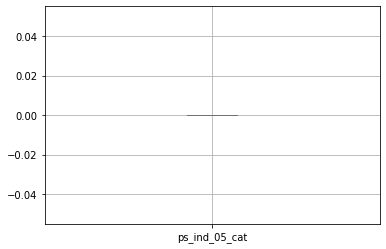

In [27]:
#Validating after removing outliers
df.boxplot(column = 'ps_ind_05_cat')

In [28]:
Q1 = df['ps_ind_08_bin'].quantile(0.25)
Q3 = df['ps_ind_08_bin'].quantile(0.75)
IQR = Q3 - Q1
Outliers3 = df[(df.ps_ind_08_bin < (Q1 - 1.5 * IQR)) | (df.ps_ind_08_bin > (Q3 + 1.5 * IQR))]

In [29]:
Outliers3

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
1            0          1              1          7              0   
8            0          5              1          3              1   
10           0          5              2          2              0   
12           0          2              1          1              1   
16           0          1              2          1              0   
...        ...        ...            ...        ...            ...   
595176       0          2              1          4              0   
595185       0          0              2          8              1   
595191       0          5              1          3              0   
595199       0          3              1          3              1   
595210       0          5              2          3              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
1                   0              0              0              1   
8                   0              0              0              1   
10                  0              0              0              1   
12                  0              0              0              1   
16                  0              0              0              1   
...               ...            ...            ...            ...   
595176              0              0              0              1   
595185              0              0              0              1   
595191              0              0              0              1   
595199              0              0              0              1   
595210              0              0              0              1   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
1                   0  ...           3           1           1           9   
8                   0  ...           4           2           1           5   
10                  0  ...           6           3           3           6   
12                  0  ...           6           3           3           8   
16                  0  ...           3           3           1           8   
...               ...  ...         ...         ...         ...         ...   
595176              0  ...           7           2           4           5   
595185              0  ...          10           1           1          11   
595191              0  ...           8           2           1          11   
595199              0  ...           1           1           1          10   
595210              0  ...           4           1           4           2   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
1                    0               1               1               0   
8                    0               1               0               0   
10                   0               1               1               0   
12                   0               0               1               0   
16                   0               0               1               0   
...                ...             ...             ...             ...   
595176               0               1               1               0   
595185               0               1               0               1   
595191               0               0               1               1   
595199               0               0               1               0   
595210               0               1               1               1   

        ps_calc_19_bin  ps_calc_20_bin  
1                    1               0  
8                    0               1  
10                   1               1  
12                   0               1  
16                   0               0  
...                ...             ...  
595176               0               1  
595185               0               0  
595191               0               1  
595199               1               0  
595210               0               0  

[84333 

In [30]:
df.drop(Outliers3.index, axis = 0, inplace =True)

<AxesSubplot:>

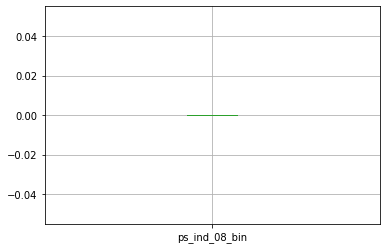

In [31]:
#Validating after removing outliers
df.boxplot(column = 'ps_ind_08_bin')

In [32]:
Q1 = df['ps_ind_09_bin'].quantile(0.25)
Q3 = df['ps_ind_09_bin'].quantile(0.75)
IQR = Q3 - Q1
Outliers4 = df[(df.ps_ind_09_bin < (Q1 - 1.5 * IQR)) | (df.ps_ind_09_bin > (Q3 + 1.5 * IQR))]

In [33]:
Outliers4

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
5            0          5              1          4              0   
14           0          5              1         11              0   
27           0          4              1          6              0   
38           0          4              1          9              0   
68           0          1              1          3              1   
...        ...        ...            ...        ...            ...   
595198       0          5              1          7              1   
595201       0          0              2          2              1   
595206       0          0              1          2              0   
595207       0          3              1         10              0   
595208       0          5              1          3              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
5                   0              0              0              0   
14                  0              0              0              0   
27                  0              0              0              0   
38                  0              0              0              0   
68                  0              0              0              0   
...               ...            ...            ...            ...   
595198              0              0              0              0   
595201              0              0              0              0   
595206              0              0              0              0   
595207              0              0              0              0   
595208              0              0              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
5                   1  ...           4           2           0           9   
14                  1  ...           4           1           3           9   
27                  1  ...           7           2           2          11   
38                  1  ...           5           0           4           6   
68                  1  ...           3           2           3           7   
...               ...  ...         ...         ...         ...         ...   
595198              1  ...           6           2           2          14   
595201              1  ...           4           1           2           6   
595206              1  ...           8           0           1           7   
595207              1  ...           4           1           9           6   
595208              1  ...           4           1           3           8   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
5                    0               1               0               1   
14                   0               0               0               0   
27                   0               1               0               1   
38                   0               1               0               0   
68                   0               0               1               1   
...                ...             ...             ...             ...   
595198               0               1               1               0   
595201               1               1               0               1   
595206               0               1               1               0   
595207               0               1               1               0   
595208               1               0               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
5                    1               1  
14                   1               0  
27                   0               0  
38                   1               0  
68                   1               0  
...                ...             ...  
595198               0               0  
595201               1               0  
595206               0               0  
595207               1               1  
595208               1               1  

[95030 

In [34]:
df.drop(Outliers4.index, axis = 0, inplace =True)

<AxesSubplot:>

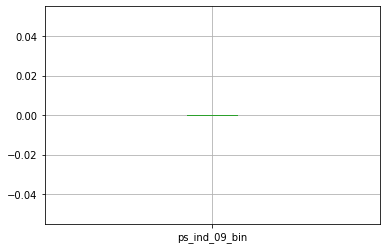

In [35]:
#Validating after removing outliers
df.boxplot(column = 'ps_ind_09_bin')

In [36]:
Q1 = df['ps_ind_10_bin'].quantile(0.25)
Q3 = df['ps_ind_10_bin'].quantile(0.75)
IQR = Q3 - Q1
Outliers5 = df[(df.ps_ind_10_bin < (Q1 - 1.5 * IQR)) | (df.ps_ind_10_bin > (Q3 + 1.5 * IQR))]

In [37]:
Outliers5

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
5701         0          0              1          5              0   
25661        0          1              2          9              1   
36737        0          0              1          7              0   
37630        0          0              1          5              1   
37647        0          2              3          6              0   
...        ...        ...            ...        ...            ...   
575298       0          5              1          8              0   
590597       0          0              3          7              1   
591529       0          5              1          6              1   
591615       0          5              1          4              1   
594997       0          3              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
5701                0              0              1              0   
25661               0              0              1              0   
36737               0              1              0              0   
37630               0              0              1              0   
37647               0              0              1              0   
...               ...            ...            ...            ...   
575298              0              0              1              0   
590597              0              0              1              0   
591529              0              0              1              0   
591615              0              0              1              0   
594997              0              0              1              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
5701                0  ...           1           4           3          10   
25661               0  ...           4           2           5          14   
36737               0  ...           2           2           3           5   
37630               0  ...          11           0           2           6   
37647               0  ...           7           0           1           7   
...               ...  ...         ...         ...         ...         ...   
575298              0  ...           9           1           2           9   
590597              0  ...           5           1           4           7   
591529              0  ...           7           2           2           8   
591615              0  ...           5           5           1          11   
594997              0  ...           5           1           4          11   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
5701                 0               1               1               0   
25661                0               1               1               1   
36737                0               0               1               0   
37630                0               1               0               0   
37647                0               0               1               0   
...                ...             ...             ...             ...   
575298               1               1               0               1   
590597               0               1               1               0   
591529               1               1               1               1   
591615               0               1               1               0   
594997               0               1               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
5701                 1               0  
25661                1               0  
36737                1               1  
37630                1               0  
37647                0               0  
...                ...             ...  
575298               1               0  
590597               1               0  
591529               0               0  
591615               0               0  
594997               0               1  

[123 ro

In [38]:
df.drop(Outliers5.index, axis = 0, inplace =True)

<AxesSubplot:>

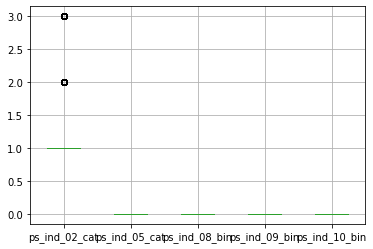

In [39]:
#Validating after removing outliers
df[['ps_ind_02_cat', 'ps_ind_05_cat', 'ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin']].boxplot()

<AxesSubplot:>

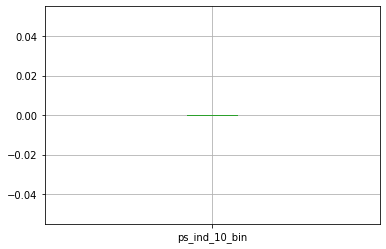

In [40]:
#Validating after removing outliers
df.boxplot(column = 'ps_ind_10_bin')

In [41]:
Q1 = df['ps_ind_11_bin'].quantile(0.25)
Q3 = df['ps_ind_11_bin'].quantile(0.75)
IQR = Q3 - Q1
Outliers6 = df[(df.ps_ind_11_bin < (Q1 - 1.5 * IQR)) | (df.ps_ind_11_bin > (Q3 + 1.5 * IQR))]

In [42]:
Outliers6

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
351          0          0              3          7              1   
1189         0          2              1          4              1   
1206         0          0              1          6              0   
5465         0          0              1          5              1   
5566         0          0              1          6              0   
...        ...        ...            ...        ...            ...   
587377       0          0              3         11              0   
587953       0          0              2          2              1   
588777       0          0              2          3              1   
592172       0          1              1          6              1   
593221       0          0              1          5              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
351                 0              0              1              0   
1189                0              1              0              0   
1206                0              0              1              0   
5465                0              1              0              0   
5566                0              1              0              0   
...               ...            ...            ...            ...   
587377              0              0              1              0   
587953              0              1              0              0   
588777              0              0              1              0   
592172              0              0              1              0   
593221              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
351                 0  ...           7           1           3           8   
1189                0  ...           3           0           3          10   
1206                0  ...           5           3           3          10   
5465                0  ...           3           0           2           7   
5566                0  ...           6           1           5           5   
...               ...  ...         ...         ...         ...         ...   
587377              0  ...           6           0           1           3   
587953              0  ...           7           1           4           8   
588777              0  ...           3           1           3           3   
592172              0  ...           1           1           5           3   
593221              0  ...           3           2           0           5   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
351                  0               1               1               0   
1189                 0               1               0               0   
1206                 0               1               1               0   
5465                 0               1               0               0   
5566                 0               1               1               0   
...                ...             ...             ...             ...   
587377               0               1               0               0   
587953               0               1               0               0   
588777               0               1               0               1   
592172               0               1               1               0   
593221               1               1               0               0   

        ps_calc_19_bin  ps_calc_20_bin  
351                  0               0  
1189                 1               0  
1206                 1               0  
5465                 0               1  
5566                 1               0  
...                ...             ...  
587377               0               0  
587953               0               0  
588777               0               0  
592172               1               0  
593221               0               1  

[563 ro

In [43]:
df.drop(Outliers6.index, axis = 0, inplace =True)

<AxesSubplot:>

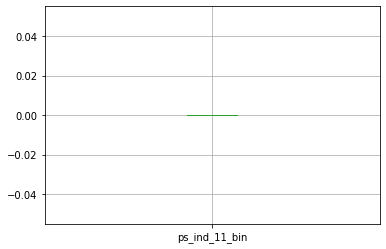

In [44]:
#Validating after removing outliers
df.boxplot(column = 'ps_ind_11_bin')

In [45]:
Q1 = df['ps_ind_12_bin'].quantile(0.25)
Q3 = df['ps_ind_12_bin'].quantile(0.75)
IQR = Q3 - Q1
Outliers7 = df[(df.ps_ind_12_bin < (Q1 - 1.5 * IQR)) | (df.ps_ind_12_bin > (Q3 + 1.5 * IQR))]

In [46]:
Outliers7

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
47           0          0              1          9              0   
173          0          2              1          6              0   
225          0          0              1          5              0   
322          0          2              1          4              1   
325          0          2              2          2              1   
...        ...        ...            ...        ...            ...   
593464       0          1              1          3              1   
593475       0          0              1          1              0   
593950       0          0              2          1              1   
594037       0          0              1          4              0   
595175       0          1              1          7              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
47                  0              0              1              0   
173                 0              0              1              0   
225                 0              0              1              0   
322                 0              0              1              0   
325                 0              0              1              0   
...               ...            ...            ...            ...   
593464              0              0              1              0   
593475              0              0              1              0   
593950              0              1              0              0   
594037              0              1              0              0   
595175              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
47                  0  ...           4           5           3          11   
173                 0  ...           5           0           5           7   
225                 0  ...           3           2           3           9   
322                 0  ...           5           0           1           6   
325                 0  ...           6           4           3           9   
...               ...  ...         ...         ...         ...         ...   
593464              0  ...           2           0           3           9   
593475              0  ...           6           2           2           8   
593950              0  ...           4           1           3           5   
594037              0  ...           1           3           6           3   
595175              0  ...           5           1           1           8   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
47                   0               1               1               0   
173                  0               0               1               1   
225                  0               0               0               0   
322                  0               1               1               0   
325                  0               1               1               0   
...                ...             ...             ...             ...   
593464               0               0               1               0   
593475               0               1               1               0   
593950               0               0               1               0   
594037               0               1               0               0   
595175               0               1               0               0   

        ps_calc_19_bin  ps_calc_20_bin  
47                   1               0  
173                  0               0  
225                  0               0  
322                  0               1  
325                  0               0  
...                ...             ...  
593464               0               0  
593475               0               0  
593950               1               0  
594037               0               0  
595175               0               0  

[3061 r

In [47]:
df.drop(Outliers7.index, axis = 0, inplace =True)

<AxesSubplot:>

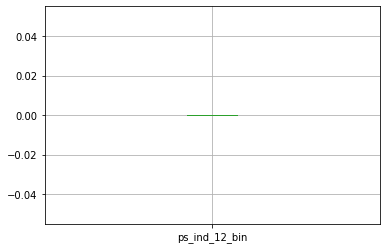

In [48]:
#Validating after removing outliers
df.boxplot(column = 'ps_ind_12_bin')

In [49]:
Q1 = df['ps_ind_13_bin'].quantile(0.25)
Q3 = df['ps_ind_13_bin'].quantile(0.75)
IQR = Q3 - Q1
Outliers8 = df[(df.ps_ind_13_bin < (Q1 - 1.5 * IQR)) | (df.ps_ind_13_bin > (Q3 + 1.5 * IQR))]

In [50]:
Outliers8

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
4474         0          0              1          7              0   
5818         0          4              2          6              1   
12028        0          2              1          6              1   
13183        0          6              1          3              1   
16243        0          2              1          3              1   
...        ...        ...            ...        ...            ...   
562187       0          0              2          3              0   
578014       0          0              3          7              1   
581001       0          1              3          7              0   
584715       0          1              2          3              1   
593235       0          0              1          6              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
4474                0              1              0              0   
5818                0              0              1              0   
12028               0              0              1              0   
13183               0              0              1              0   
16243               0              0              1              0   
...               ...            ...            ...            ...   
562187              0              1              0              0   
578014              0              0              1              0   
581001              0              1              0              0   
584715              0              1              0              0   
593235              0              0              1              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
4474                0  ...           8           0           4          11   
5818                0  ...           2           2           2           7   
12028               0  ...           3           3           4          11   
13183               0  ...           4           2           1          10   
16243               0  ...           2           0           1           8   
...               ...  ...         ...         ...         ...         ...   
562187              0  ...           4           1           3           6   
578014              0  ...           4           0           6          10   
581001              0  ...           2           1           1          10   
584715              0  ...           5           1           2           2   
593235              0  ...           9           2           1           9   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
4474                 0               1               0               1   
5818                 0               0               1               0   
12028                0               1               1               0   
13183                0               0               0               1   
16243                0               1               1               0   
...                ...             ...             ...             ...   
562187               0               1               0               1   
578014               0               0               0               0   
581001               0               0               0               0   
584715               0               0               1               1   
593235               1               1               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
4474                 1               0  
5818                 1               1  
12028                1               0  
13183                0               0  
16243                0               0  
...                ...             ...  
562187               1               0  
578014               0               1  
581001               0               0  
584715               1               0  
593235               0               0  

[144 ro

In [51]:
df.drop(Outliers8.index, axis = 0, inplace =True)

<AxesSubplot:>

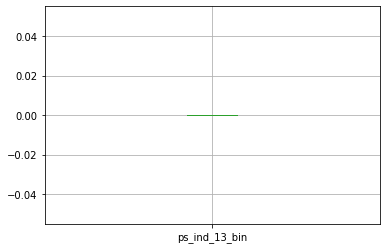

In [52]:
#Validating after removing outliers
df.boxplot(column = 'ps_ind_13_bin')

In [53]:
Q1 = df['ps_ind_14'].quantile(0.25)
Q3 = df['ps_ind_14'].quantile(0.75)
IQR = Q3 - Q1
Outliers9 = df[(df.ps_ind_14 < (Q1 - 1.5 * IQR)) | (df.ps_ind_14 > (Q3 + 1.5 * IQR))]

In [54]:
Outliers9

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [55]:
df.drop(Outliers9.index, axis = 0, inplace =True)

<AxesSubplot:>

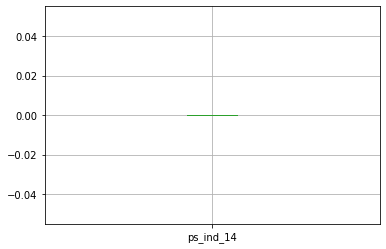

In [56]:
#Validating after removing outliers
df.boxplot(column = 'ps_ind_14')

In [57]:
Q1 = df['ps_ind_17_bin'].quantile(0.25)
Q3 = df['ps_ind_17_bin'].quantile(0.75)
IQR = Q3 - Q1
Outliers10 = df[(df.ps_ind_17_bin < (Q1 - 1.5 * IQR)) | (df.ps_ind_17_bin > (Q3 + 1.5 * IQR))]

In [58]:
Outliers10

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0            0          2              2          5              1   
30           0          0              1          6              0   
33           0          0              1          8              0   
50           0          3              1          2              1   
51           0          6              1          6              0   
...        ...        ...            ...        ...            ...   
595112       0          1              1          6              0   
595139       0          6              1          5              0   
595144       0          0              2          8              0   
595173       0          1              1          7              0   
595203       0          3              2          3              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                   0              0              1              0   
30                  0              1              0              0   
33                  0              1              0              0   
50                  0              0              1              0   
51                  0              1              0              0   
...               ...            ...            ...            ...   
595112              0              1              0              0   
595139              0              0              1              0   
595144              0              1              0              0   
595173              0              1              0              0   
595203              0              0              1              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
0                   0  ...           9           1           5           8   
30                  0  ...           5           3           1          11   
33                  0  ...           2           1           3          11   
50                  0  ...           7           2           5           6   
51                  0  ...           7           3           3           5   
...               ...  ...         ...         ...         ...         ...   
595112              0  ...           7           2           3           6   
595139              0  ...           4           0           5           4   
595144              0  ...           5           0           3          10   
595173              0  ...           3           3           5           7   
595203              0  ...           5           2           1           6   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
0                    0               1               1               0   
30                   0               1               0               0   
33                   1               0               1               0   
50                   0               0               1               0   
51                   0               1               1               1   
...                ...             ...             ...             ...   
595112               0               1               1               1   
595139               0               1               1               0   
595144               0               1               0               0   
595173               1               0               1               0   
595203               0               0               0               0   

        ps_calc_19_bin  ps_calc_20_bin  
0                    0               1  
30                   1               0  
33                   0               1  
50                   1               0  
51                   0               1  
...                ...             ...  
595112               0               0  
595139               0               0  
595144               1               0  
595173               0               0  
595203               0               0  

[38048 

In [59]:
df.drop(Outliers10.index, axis = 0, inplace =True)

<AxesSubplot:>

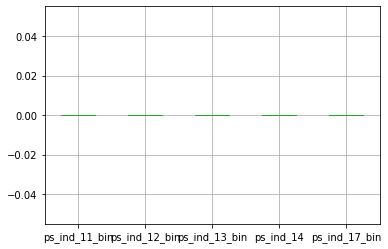

In [60]:
#Validating after removing outliers
df[['ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin','ps_ind_14','ps_ind_17_bin']].boxplot()

<AxesSubplot:>

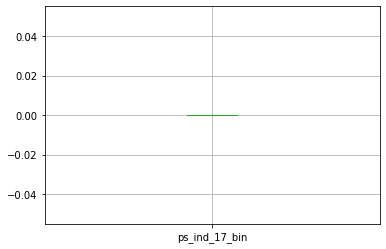

In [61]:
#Validating after removing outliers
df.boxplot(column = 'ps_ind_17_bin')

In [62]:
Q1 = df['ps_reg_02'].quantile(0.25)
Q3 = df['ps_reg_02'].quantile(0.75)
IQR = Q3 - Q1
Outliers11 = df[(df.ps_reg_02 < (Q1 - 1.5 * IQR)) | (df.ps_reg_02 > (Q3 + 1.5 * IQR))]

In [63]:
Outliers11

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
9            1          1              1          2              0   
29           0          3              2          2              0   
93           0          7              1         10              0   
98           0          5              1          2              0   
102          0          1              2          5              1   
...        ...        ...            ...        ...            ...   
594893       0          2              2          1              0   
595039       0          0              1         11              1   
595062       0          4              1          5              0   
595084       0          5              1          9              1   
595089       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
9                   0              0              1              0   
29                  0              1              0              0   
93                  0              0              1              0   
98                  0              0              1              0   
102                 0              0              1              0   
...               ...            ...            ...            ...   
594893              0              1              0              0   
595039              0              1              0              0   
595062              0              1              0              0   
595084              0              0              1              0   
595089              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
9                   0  ...           3           5           0           6   
29                  0  ...           2           0           4           7   
93                  0  ...           5           3           1           4   
98                  0  ...           8           1           4          11   
102                 0  ...           7           2           2           8   
...               ...  ...         ...         ...         ...         ...   
594893              0  ...           6           3           2           6   
595039              0  ...           5           0           2           5   
595062              0  ...           3           2           3           8   
595084              0  ...           8           0           4           6   
595089              0  ...           3           1           1          11   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
9                    0               1               0               0   
29                   0               1               0               0   
93                   0               0               1               0   
98                   0               0               1               0   
102                  0               1               0               0   
...                ...             ...             ...             ...   
594893               1               1               1               0   
595039               0               1               0               1   
595062               0               0               1               1   
595084               0               0               0               0   
595089               0               1               0               1   

        ps_calc_19_bin  ps_calc_20_bin  
9                    1               0  
29                   0               0  
93                   0               0  
98                   0               1  
102                  0               0  
...                ...             ...  
594893               0               0  
595039               1               1  
595062               1               0  
595084               0               1  
595089               0               0  

[31860 

In [64]:
df.drop(Outliers11.index, axis = 0, inplace =True)

<AxesSubplot:>

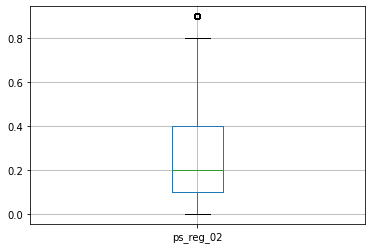

In [65]:
#Validating after removing outliers
df.boxplot(column = 'ps_reg_02')

In [66]:
Q1 = df['ps_reg_03'].quantile(0.25)
Q3 = df['ps_reg_03'].quantile(0.75)
IQR = Q3 - Q1
Outliers12 = df[(df.ps_reg_03 < (Q1 - 1.5 * IQR)) | (df.ps_reg_03 > (Q3 + 1.5 * IQR))]

In [67]:
Outliers12

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
15           0          5              1          3              1   
18           0          5              1          8              0   
23           0          2              1          2              1   
25           0          0              1          7              0   
43           0          6              1          5              1   
...        ...        ...            ...        ...            ...   
595170       0          1              1          9              0   
595188       0          2              1          3              0   
595190       0          1              2          3              0   
595194       0          0              1          7              1   
595211       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
15                  0              0              1              0   
18                  0              1              0              0   
23                  0              0              1              0   
25                  0              1              0              0   
43                  0              0              1              0   
...               ...            ...            ...            ...   
595170              0              1              0              0   
595188              0              1              0              0   
595190              0              1              0              0   
595194              0              0              1              0   
595211              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
15                  0  ...           5           2           6           7   
18                  0  ...           3           1           6           5   
23                  0  ...           7           1           3           9   
25                  0  ...           6           4           4           4   
43                  0  ...           3           2           3           6   
...               ...  ...         ...         ...         ...         ...   
595170              0  ...           3           2           2           5   
595188              0  ...           8           1           6           6   
595190              0  ...           1           0           4           6   
595194              0  ...           6           1           4          12   
595211              0  ...           4           4           3           8   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
15                   0               1               1               0   
18                   0               0               0               1   
23                   0               1               0               1   
25                   0               0               1               1   
43                   0               1               0               1   
...                ...             ...             ...             ...   
595170               0               0               0               0   
595188               0               1               1               0   
595190               0               0               1               0   
595194               0               1               1               0   
595211               0               1               0               0   

        ps_calc_19_bin  ps_calc_20_bin  
15                   1               0  
18                   0               0  
23                   0               0  
25                   0               1  
43                   0               0  
...                ...             ...  
595170               0               1  
595188               0               0  
595190               0               0  
595194               0               0  
595211               0               0  

[64309 

In [68]:
df.drop(Outliers12.index, axis = 0, inplace =True)

<AxesSubplot:>

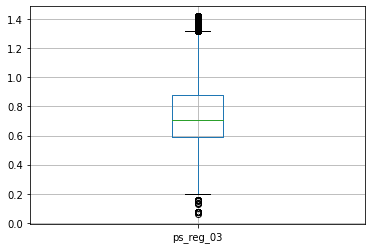

In [69]:
#Validating after removing outliers
df.boxplot(column = 'ps_reg_03')

In [70]:
Q1 = df['ps_car_01_cat'].quantile(0.25)
Q3 = df['ps_car_01_cat'].quantile(0.75)
IQR = Q3 - Q1
Outliers13 = df[(df.ps_car_01_cat < (Q1 - 1.5 * IQR)) | (df.ps_car_01_cat > (Q3 + 1.5 * IQR))]

In [71]:
Outliers13

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
63           0          0              1          5              0   
175          0          0              1          3              0   
344          0          6              1          5              0   
1224         0          0              2          1              1   
2764         0          3              1          6              0   
...        ...        ...            ...        ...            ...   
592111       0          0              3          2              1   
593178       0          1              1          2              1   
594438       0          0              3          3              0   
594625       0          0              1          3              0   
594899       0          5              1          5              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
63                  0              1              0              0   
175                 0              1              0              0   
344                 0              1              0              0   
1224                0              1              0              0   
2764                0              0              1              0   
...               ...            ...            ...            ...   
592111              0              1              0              0   
593178              0              0              1              0   
594438              0              1              0              0   
594625              0              0              1              0   
594899              0              0              1              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
63                  0  ...           6           2           1           7   
175                 0  ...           9           1           3           7   
344                 0  ...           1           0           4           9   
1224                0  ...           4           0           6           5   
2764                0  ...           2           0           2           5   
...               ...  ...         ...         ...         ...         ...   
592111              0  ...           1           1           4           6   
593178              0  ...           6           1           0           5   
594438              0  ...           4           1           2          12   
594625              0  ...           6           2           2           6   
594899              0  ...           3           0           2          15   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
63                   0               0               1               0   
175                  0               1               1               0   
344                  0               1               1               0   
1224                 0               1               1               0   
2764                 0               0               1               0   
...                ...             ...             ...             ...   
592111               1               1               0               0   
593178               0               1               1               1   
594438               0               1               0               0   
594625               0               0               0               1   
594899               0               1               0               1   

        ps_calc_19_bin  ps_calc_20_bin  
63                   0               0  
175                  1               0  
344                  0               1  
1224                 1               0  
2764                 0               0  
...                ...             ...  
592111               1               0  
593178               0               0  
594438               1               0  
594625               0               0  
594899               0               0  

[940 ro

In [72]:
df.drop(Outliers13.index, axis = 0, inplace =True)

<AxesSubplot:>

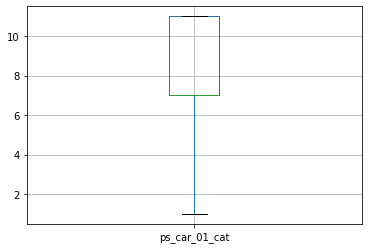

In [73]:
#Validating after removing outliers
df.boxplot(column = 'ps_car_01_cat')

In [74]:
Q1 = df['ps_car_02_cat'].quantile(0.25)
Q3 = df['ps_car_02_cat'].quantile(0.75)
IQR = Q3 - Q1
Outliers14 = df[(df.ps_car_02_cat < (Q1 - 1.5 * IQR)) | (df.ps_car_02_cat > (Q3 + 1.5 * IQR))]

In [75]:
Outliers14

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
11           0          2              1          3              1   
40           0          2              1          4              0   
57           0          0              1          4              0   
78           0          2              2          1              0   
160          0          2              1          4              1   
...        ...        ...            ...        ...            ...   
595104       0          5              1          7              0   
595108       0          0              1          2              0   
595145       0          5              1          4              0   
595178       0          0              1          5              1   
595195       0          0              3          3              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
11                  0              0              1              0   
40                  0              1              0              0   
57                  0              1              0              0   
78                  0              1              0              0   
160                 0              0              1              0   
...               ...            ...            ...            ...   
595104              0              1              0              0   
595108              0              1              0              0   
595145              0              1              0              0   
595178              0              1              0              0   
595195              0              0              1              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
11                  0  ...           9           2           1          10   
40                  0  ...           9           3           1           9   
57                  0  ...           1           1           4           6   
78                  0  ...           8           1           1           5   
160                 0  ...           4           4           1           6   
...               ...  ...         ...         ...         ...         ...   
595104              0  ...           2           2           1           5   
595108              0  ...           5           2           3           8   
595145              0  ...           7           3           2           3   
595178              0  ...           6           2           5          10   
595195              0  ...           8           0           2           5   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
11                   0               1               0               1   
40                   0               1               1               1   
57                   0               1               1               0   
78                   0               0               1               0   
160                  0               0               0               0   
...                ...             ...             ...             ...   
595104               0               1               1               0   
595108               0               1               1               1   
595145               0               1               1               1   
595178               0               1               0               1   
595195               0               1               0               0   

        ps_calc_19_bin  ps_calc_20_bin  
11                   0               0  
40                   0               1  
57                   1               1  
78                   0               0  
160                  0               0  
...                ...             ...  
595104               1               0  
595108               0               0  
595145               0               0  
595178               1               0  
595195               1               1  

[27243 

In [76]:
df.drop(Outliers14.index, axis = 0, inplace =True)

<AxesSubplot:>

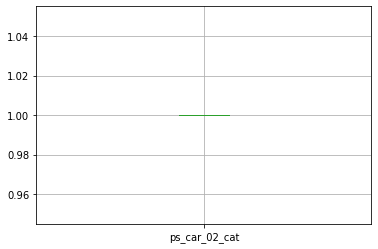

In [77]:
#Validating after removing outliers
df.boxplot(column = 'ps_car_02_cat')

In [78]:
Q1 = df['ps_car_04_cat'].quantile(0.25)
Q3 = df['ps_car_04_cat'].quantile(0.75)
IQR = Q3 - Q1
Outliers15 = df[(df.ps_car_04_cat < (Q1 - 1.5 * IQR)) | (df.ps_car_04_cat > (Q3 + 1.5 * IQR))]

In [79]:
Outliers15

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
34           0          0              1          1              1   
147          0          0              1          2              1   
198          0          3              1          3              1   
215          0          0              3          3              1   
237          0          2              1          6              0   
...        ...        ...            ...        ...            ...   
595103       0          0              1          5              0   
595127       0          2              3          4              0   
595184       0          1              1          5              0   
595196       0          1              1          2              0   
595197       0          1              1          7              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
34                  0              0              1              0   
147                 0              1              0              0   
198                 0              0              1              0   
215                 0              0              1              0   
237                 0              1              0              0   
...               ...            ...            ...            ...   
595103              0              1              0              0   
595127              0              0              1              0   
595184              0              1              0              0   
595196              0              1              0              0   
595197              0              0              1              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
34                  0  ...           3           2           6           8   
147                 0  ...          11           1           2          10   
198                 0  ...           9           1           1           4   
215                 0  ...           3           0           2          11   
237                 0  ...           4           0           2          11   
...               ...  ...         ...         ...         ...         ...   
595103              0  ...           7           0           2          10   
595127              0  ...           5           2           3           8   
595184              0  ...           7           0           3           9   
595196              0  ...           6           0           1          11   
595197              0  ...           4           1           3           6   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
34                   0               1               0               0   
147                  0               1               0               1   
198                  1               1               1               0   
215                  0               1               1               1   
237                  0               0               0               0   
...                ...             ...             ...             ...   
595103               0               0               0               0   
595127               0               1               1               0   
595184               0               0               0               0   
595196               1               1               0               0   
595197               0               0               1               1   

        ps_calc_19_bin  ps_calc_20_bin  
34                   0               0  
147                  0               0  
198                  0               0  
215                  1               0  
237                  1               0  
...                ...             ...  
595103               0               0  
595127               0               0  
595184               0               1  
595196               1               1  
595197               1               0  

[14335 

In [80]:
df.drop(Outliers15.index, axis = 0, inplace =True)

<AxesSubplot:>

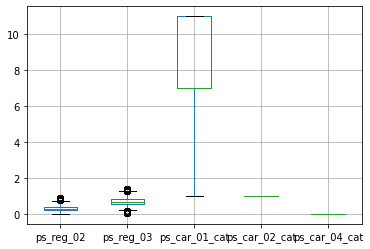

In [81]:
#Validating after removing outliers
df[['ps_reg_02', 'ps_reg_03', 'ps_car_01_cat','ps_car_02_cat','ps_car_04_cat']].boxplot()

<AxesSubplot:>

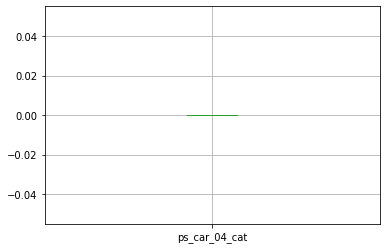

In [82]:
#Validating after removing outliers
df.boxplot(column = 'ps_car_04_cat')

In [83]:
Q1 = df['ps_car_07_cat'].quantile(0.25)
Q3 = df['ps_car_07_cat'].quantile(0.75)
IQR = Q3 - Q1
Outliers16 = df[(df.ps_car_07_cat < (Q1 - 1.5 * IQR)) | (df.ps_car_07_cat > (Q3 + 1.5 * IQR))]

In [84]:
Outliers16

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
163          0          1              2          2              0   
281          0          1              1          3              0   
534          0          0              3          5              1   
642          0          0              1          3              1   
845          1          0              1         10              0   
...        ...        ...            ...        ...            ...   
594725       0          1              1          6              0   
594823       1          6              2          2              1   
595036       0          1              1          7              0   
595119       0          1              1          4              0   
595182       0          0              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
163                 0              1              0              0   
281                 0              1              0              0   
534                 0              0              1              0   
642                 0              1              0              0   
845                 0              1              0              0   
...               ...            ...            ...            ...   
594725              0              1              0              0   
594823              0              0              1              0   
595036              0              1              0              0   
595119              0              1              0              0   
595182              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
163                 0  ...           5           1           3           5   
281                 0  ...           3           0           3           5   
534                 0  ...           7           0           3          10   
642                 0  ...           7           1           2           7   
845                 0  ...           8           1           2           3   
...               ...  ...         ...         ...         ...         ...   
594725              0  ...           4           1           5          10   
594823              0  ...           4           1           2           5   
595036              0  ...           7           4           3           9   
595119              0  ...           6           0           4          11   
595182              0  ...          12           0           5           8   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
163                  0               1               0               0   
281                  0               1               1               0   
534                  0               1               0               1   
642                  0               0               0               0   
845                  0               1               1               1   
...                ...             ...             ...             ...   
594725               0               0               0               0   
594823               0               1               1               0   
595036               0               1               0               0   
595119               0               1               0               1   
595182               0               0               0               1   

        ps_calc_19_bin  ps_calc_20_bin  
163                  0               1  
281                  1               0  
534                  0               0  
642                  0               0  
845                  0               0  
...                ...             ...  
594725               0               0  
594823               1               1  
595036               0               0  
595119               1               0  
595182               1               0  

[6217 r

In [85]:
df.drop(Outliers16.index, axis = 0, inplace =True)

<AxesSubplot:>

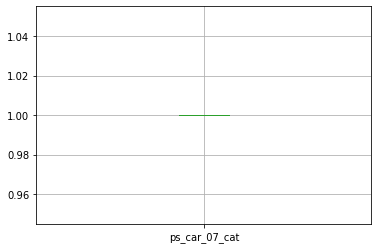

In [86]:
#Validating after removing outliers
df.boxplot(column = 'ps_car_07_cat')

In [87]:
Q1 = df['ps_car_08_cat'].quantile(0.25)
Q3 = df['ps_car_08_cat'].quantile(0.75)
IQR = Q3 - Q1
Outliers17 = df[(df.ps_car_08_cat < (Q1 - 1.5 * IQR)) | (df.ps_car_08_cat > (Q3 + 1.5 * IQR))]

In [88]:
Outliers17

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
64           0          0              1          7              0   
69           0          2              1          2              1   
74           0          0              1          2              0   
91           0          0              2          1              0   
108          1          0              1          3              0   
...        ...        ...            ...        ...            ...   
595120       0          6              1          4              0   
595126       0          2              1          8              1   
595152       0          0              2          1              1   
595186       0          0              1          3              1   
595192       0          0              1          1              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
64                  0              1              0              0   
69                  0              0              1              0   
74                  0              1              0              0   
91                  0              1              0              0   
108                 0              1              0              0   
...               ...            ...            ...            ...   
595120              0              0              1              0   
595126              0              0              1              0   
595152              0              1              0              0   
595186              0              0              1              0   
595192              0              0              1              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
64                  0  ...           5           5           1           5   
69                  0  ...           8           1           1          11   
74                  0  ...           6           2           3           6   
91                  0  ...           9           4           6           5   
108                 0  ...           9           2           5           7   
...               ...  ...         ...         ...         ...         ...   
595120              0  ...           5           3           1           6   
595126              0  ...           4           3           2           6   
595152              0  ...           6           3           2          10   
595186              0  ...          10           0           2           9   
595192              0  ...           5           1           5           5   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
64                   0               1               0               0   
69                   0               0               1               1   
74                   0               0               0               0   
91                   0               1               1               0   
108                  0               0               0               0   
...                ...             ...             ...             ...   
595120               1               1               1               0   
595126               1               0               0               0   
595152               0               1               0               0   
595186               0               0               1               1   
595192               0               1               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
64                   0               0  
69                   0               0  
74                   0               1  
91                   0               0  
108                  0               0  
...                ...             ...  
595120               0               0  
595126               1               0  
595152               0               0  
595186               0               0  
595192               1               1  

[25804 

In [89]:
df.drop(Outliers17.index, axis = 0, inplace =True)

<AxesSubplot:>

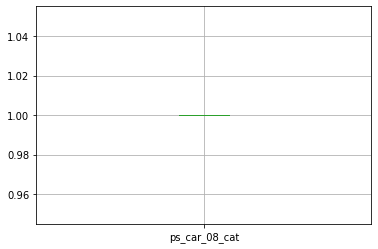

In [90]:
#Validating after removing outliers
df.boxplot(column = 'ps_car_08_cat')

In [91]:
Q1 = df['ps_car_10_cat'].quantile(0.25)
Q3 = df['ps_car_10_cat'].quantile(0.75)
IQR = Q3 - Q1
Outliers18 = df[(df.ps_car_10_cat < (Q1 - 1.5 * IQR)) | (df.ps_car_10_cat > (Q3 + 1.5 * IQR))]

In [92]:
Outliers18

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
148          0          5              2          7              1   
759          0          0              1          9              0   
1462         0          0              1          4              0   
1629         0          0              1          2              1   
2956         0          1              1          3              1   
...        ...        ...            ...        ...            ...   
594202       1          1              1          5              0   
594429       0          0              1          4              0   
594454       0          0              2          2              1   
594548       0          1              1          9              0   
594860       0          1              1          3              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
148                 0              1              0              0   
759                 0              1              0              0   
1462                0              1              0              0   
1629                0              1              0              0   
2956                0              1              0              0   
...               ...            ...            ...            ...   
594202              0              0              1              0   
594429              0              1              0              0   
594454              0              1              0              0   
594548              0              1              0              0   
594860              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
148                 0  ...           4           1           1          10   
759                 0  ...           5           3           2           9   
1462                0  ...           4           1           3           7   
1629                0  ...          10           1           4           9   
2956                0  ...           5           2           4           8   
...               ...  ...         ...         ...         ...         ...   
594202              0  ...           1           0           1           5   
594429              0  ...           5           1           4          10   
594454              0  ...           6           1           5           8   
594548              0  ...           5           1           5          14   
594860              0  ...           7           3           0           5   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
148                  0               1               1               0   
759                  0               1               0               0   
1462                 0               0               0               0   
1629                 0               1               1               0   
2956                 1               0               0               1   
...                ...             ...             ...             ...   
594202               0               1               1               0   
594429               1               1               0               0   
594454               1               1               1               0   
594548               0               0               0               0   
594860               1               1               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
148                  0               0  
759                  1               0  
1462                 0               0  
1629                 1               1  
2956                 0               0  
...                ...             ...  
594202               1               0  
594429               0               0  
594454               0               0  
594548               1               0  
594860               1               0  

[1617 r

In [93]:
df.drop(Outliers18.index, axis = 0, inplace =True)

<AxesSubplot:>

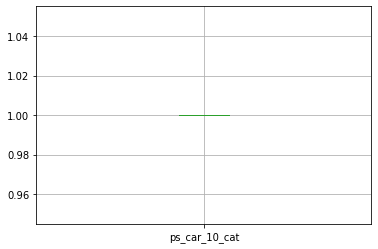

In [94]:
#Validating after removing outliers
df.boxplot(column = 'ps_car_10_cat')

In [95]:
Q1 = df['ps_car_11'].quantile(0.25)
Q3 = df['ps_car_11'].quantile(0.75)
IQR = Q3 - Q1
Outliers19 = df[(df.ps_car_11 < (Q1 - 1.5 * IQR)) | (df.ps_car_11 > (Q3 + 1.5 * IQR))]

In [96]:
Outliers19

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3623         0          1              1          3              1   
5532         0          1              1          9              1   
13241        0          5              2          4              1   
27988        0          1              1          1              0   
33333        0          7              2          6              1   
...        ...        ...            ...        ...            ...   
582724       0          1              2          1              0   
583521       0          6              1          8              1   
587228       0          1              2          1              0   
587828       0          0              2          2              1   
593261       0          2              2          3              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
3623                0              1              0              0   
5532                0              1              0              0   
13241               0              0              1              0   
27988               0              1              0              0   
33333               0              0              1              0   
...               ...            ...            ...            ...   
582724              0              1              0              0   
583521              0              1              0              0   
587228              0              1              0              0   
587828              0              0              1              0   
593261              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
3623                0  ...           7           2           3          10   
5532                0  ...           6           1           3          10   
13241               0  ...           7           1           5           7   
27988               0  ...           4           2           3           5   
33333               0  ...           9           2           5           6   
...               ...  ...         ...         ...         ...         ...   
582724              0  ...           5           2           1          10   
583521              0  ...           4           4           3           7   
587228              0  ...           5           1           4           7   
587828              0  ...           7           3           3           6   
593261              0  ...           8           1           1           7   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
3623                 0               0               1               0   
5532                 0               1               1               0   
13241                0               1               1               0   
27988                0               1               1               1   
33333                0               0               0               0   
...                ...             ...             ...             ...   
582724               0               1               0               0   
583521               0               1               1               0   
587228               1               0               1               0   
587828               1               1               1               0   
593261               0               1               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
3623                 0               0  
5532                 0               0  
13241                0               0  
27988                0               0  
33333                0               0  
...                ...             ...  
582724               0               0  
583521               1               0  
587228               0               1  
587828               0               0  
593261               1               0  

[281 ro

In [97]:
df.drop(Outliers19.index, axis = 0, inplace =True)

<AxesSubplot:>

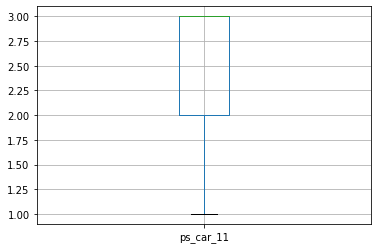

In [98]:
#Validating after removing outliers
df.boxplot(column = 'ps_car_11')

In [99]:
Q1 = df['ps_car_12'].quantile(0.25)
Q3 = df['ps_car_12'].quantile(0.75)
IQR = Q3 - Q1
Outliers20 = df[(df.ps_car_12 < (Q1 - 1.5 * IQR)) | (df.ps_car_12 > (Q3 + 1.5 * IQR))]

In [100]:
Outliers20

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
184660       0          0              1          3              0   
191673       0          0              1          8              0   
233720       0          5              1         10              0   
393817       0          1              1          6              0   
485702       0          2              3          7              0   
504535       0          5              1         11              0   
521704       0          1              3          4              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
184660              0              1              0              0   
191673              0              1              0              0   
233720              0              1              0              0   
393817              0              1              0              0   
485702              0              1              0              0   
504535              0              1              0              0   
521704              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
184660              0  ...           7           2           1          10   
191673              0  ...           5           1           2           5   
233720              0  ...          10           2           2          11   
393817              0  ...           5           1           5           3   
485702              0  ...           5           0           3           2   
504535              0  ...           2           3           3          10   
521704              0  ...           4           0           1           6   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
184660               0               0               0               0   
191673               0               1               0               0   
233720               1               1               0               0   
393817               0               0               1               0   
485702               0               1               0               1   
504535               0               1               1               1   
521704               0               1               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
184660               0               0  
191673               0               0  
233720               1               0  
393817               0               0  
485702               0               0  
504535               0               0  
521704               0               0  

[7 rows x 58 columns]

In [101]:
df.drop(Outliers20.index, axis = 0, inplace =True)

<AxesSubplot:>

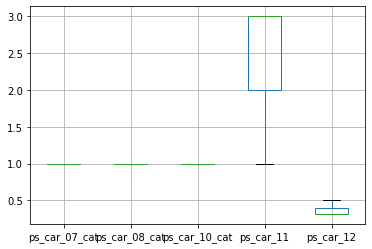

In [102]:
#Validating after removing outliers
df[['ps_car_07_cat', 'ps_car_08_cat', 'ps_car_10_cat','ps_car_11','ps_car_12']].boxplot()

<AxesSubplot:>

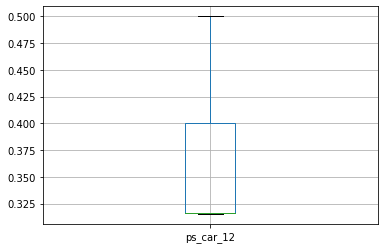

In [103]:
#Validating after removing outliers
df.boxplot(column = 'ps_car_12')

In [104]:
Q1 = df['ps_car_13'].quantile(0.25)
Q3 = df['ps_car_13'].quantile(0.75)
IQR = Q3 - Q1
Outliers21 = df[(df.ps_car_13 < (Q1 - 1.5 * IQR)) | (df.ps_car_13 > (Q3 + 1.5 * IQR))]

In [105]:
Outliers21

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
422          0          3              1          1              1   
691          0          3              1          5              0   
905          0          3              1          4              0   
1056         0          4              2          2              1   
1088         0          0              1          5              0   
...        ...        ...            ...        ...            ...   
594601       0          0              1          5              1   
594687       0          1              1          2              0   
594962       0          5              1          2              1   
594993       0          5              1          8              1   
595076       0          1              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
422                 0              0              1              0   
691                 0              0              1              0   
905                 0              1              0              0   
1056                0              0              1              0   
1088                0              1              0              0   
...               ...            ...            ...            ...   
594601              0              1              0              0   
594687              0              1              0              0   
594962              0              0              1              0   
594993              0              0              1              0   
595076              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
422                 0  ...           7           0           2           8   
691                 0  ...           3           3           4          10   
905                 0  ...          10           0           1           6   
1056                0  ...           2           4           3           9   
1088                0  ...           6           1           1           7   
...               ...  ...         ...         ...         ...         ...   
594601              0  ...           4           2           2           5   
594687              0  ...           3           1           1           7   
594962              0  ...           5           1           6           7   
594993              0  ...           8           2           1           9   
595076              0  ...           5           2           2          11   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
422                  1               1               0               0   
691                  0               1               0               1   
905                  0               0               1               0   
1056                 0               0               0               0   
1088                 1               0               0               0   
...                ...             ...             ...             ...   
594601               0               0               0               1   
594687               0               1               1               0   
594962               1               1               1               0   
594993               0               1               0               0   
595076               0               1               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
422                  1               0  
691                  0               1  
905                  0               0  
1056                 0               0  
1088                 1               0  
...                ...             ...  
594601               1               0  
594687               0               0  
594962               1               0  
594993               1               0  
595076               0               0  

[2982 r

In [106]:
df.drop(Outliers21.index, axis = 0, inplace =True)

In [107]:
Outliers21

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
422          0          3              1          1              1   
691          0          3              1          5              0   
905          0          3              1          4              0   
1056         0          4              2          2              1   
1088         0          0              1          5              0   
...        ...        ...            ...        ...            ...   
594601       0          0              1          5              1   
594687       0          1              1          2              0   
594962       0          5              1          2              1   
594993       0          5              1          8              1   
595076       0          1              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
422                 0              0              1              0   
691                 0              0              1              0   
905                 0              1              0              0   
1056                0              0              1              0   
1088                0              1              0              0   
...               ...            ...            ...            ...   
594601              0              1              0              0   
594687              0              1              0              0   
594962              0              0              1              0   
594993              0              0              1              0   
595076              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
422                 0  ...           7           0           2           8   
691                 0  ...           3           3           4          10   
905                 0  ...          10           0           1           6   
1056                0  ...           2           4           3           9   
1088                0  ...           6           1           1           7   
...               ...  ...         ...         ...         ...         ...   
594601              0  ...           4           2           2           5   
594687              0  ...           3           1           1           7   
594962              0  ...           5           1           6           7   
594993              0  ...           8           2           1           9   
595076              0  ...           5           2           2          11   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
422                  1               1               0               0   
691                  0               1               0               1   
905                  0               0               1               0   
1056                 0               0               0               0   
1088                 1               0               0               0   
...                ...             ...             ...             ...   
594601               0               0               0               1   
594687               0               1               1               0   
594962               1               1               1               0   
594993               0               1               0               0   
595076               0               1               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
422                  1               0  
691                  0               1  
905                  0               0  
1056                 0               0  
1088                 1               0  
...                ...             ...  
594601               1               0  
594687               0               0  
594962               1               0  
594993               1               0  
595076               0               0  

[2982 r

<AxesSubplot:>

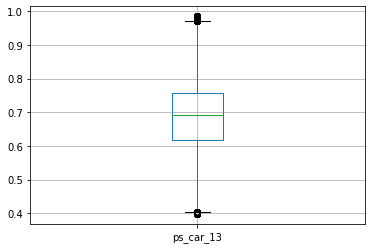

In [108]:
#Validating after removing outliers
df.boxplot(column = 'ps_car_13')

In [109]:
Q1 = df['ps_car_14'].quantile(0.25)
Q3 = df['ps_car_14'].quantile(0.75)
IQR = Q3 - Q1
Outliers22 = df[(df.ps_car_14 < (Q1 - 1.5 * IQR)) | (df.ps_car_14 > (Q3 + 1.5 * IQR))]

In [110]:
Outliers22

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
136          0          0              1          2              0   
143          0          5              1          3              1   
323          0          0              1          2              0   
391          0          3              2          1              1   
464          0          3              1          3              0   
...        ...        ...            ...        ...            ...   
594836       0          1              1          8              0   
594841       0          4              1          6              0   
594901       0          0              1          3              0   
594922       0          1              1          1              1   
594964       0          1              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
136                 0              1              0              0   
143                 0              0              1              0   
323                 0              1              0              0   
391                 0              0              1              0   
464                 0              1              0              0   
...               ...            ...            ...            ...   
594836              0              1              0              0   
594841              0              1              0              0   
594901              0              1              0              0   
594922              0              0              1              0   
594964              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
136                 0  ...           4           3           2           2   
143                 0  ...           8           2           1           9   
323                 0  ...           7           1           2           8   
391                 0  ...           5           2           2          14   
464                 0  ...           3           1           2           9   
...               ...  ...         ...         ...         ...         ...   
594836              0  ...           5           2           5           9   
594841              0  ...           6           4           2           5   
594901              0  ...           6           1           3           5   
594922              0  ...           4           0           3           7   
594964              0  ...           8           3           2           8   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
136                  0               1               1               1   
143                  0               0               1               0   
323                  0               1               0               0   
391                  0               0               0               0   
464                  1               0               1               0   
...                ...             ...             ...             ...   
594836               0               1               1               0   
594841               0               1               0               0   
594901               1               1               0               1   
594922               0               0               0               0   
594964               1               1               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
136                  0               0  
143                  1               0  
323                  0               1  
391                  1               1  
464                  0               0  
...                ...             ...  
594836               0               0  
594841               0               0  
594901               0               0  
594922               0               1  
594964               0               0  

[9309 r

In [111]:
df.drop(Outliers22.index, axis = 0, inplace =True)

<AxesSubplot:>

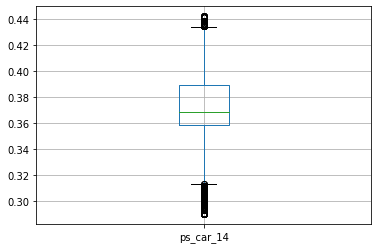

In [112]:
#Validating after removing outliers
df.boxplot(column = 'ps_car_14')

In [113]:
Q1 = df['ps_car_15'].quantile(0.25)
Q3 = df['ps_car_15'].quantile(0.75)
IQR = Q3 - Q1
Outliers23 = df[(df.ps_car_15 < (Q1 - 1.5 * IQR)) | (df.ps_car_15 > (Q3 + 1.5 * IQR))]

In [114]:
Outliers23

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
19           1          0              1          2              1   
118          0          3              1          2              0   
217          0          0              1         11              0   
279          0          7              1          7              0   
350          0          0              1          3              0   
...        ...        ...            ...        ...            ...   
594401       0          3              3          7              1   
594444       0          1              2          6              0   
594595       0          1              1          5              0   
594885       0          6              1          8              0   
595061       0          2              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
19                  0              1              0              0   
118                 0              1              0              0   
217                 0              1              0              0   
279                 0              1              0              0   
350                 0              1              0              0   
...               ...            ...            ...            ...   
594401              0              0              1              0   
594444              0              1              0              0   
594595              0              1              0              0   
594885              0              1              0              0   
595061              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
19                  0  ...          10           3           1          11   
118                 0  ...           6           1           2          10   
217                 0  ...           3           1           2           3   
279                 0  ...           3           2           3           4   
350                 0  ...           1           2           1          10   
...               ...  ...         ...         ...         ...         ...   
594401              0  ...           4           3           2          10   
594444              0  ...           4           1           6          10   
594595              0  ...           7           3           4          10   
594885              0  ...           6           2           1          12   
595061              0  ...           3           0           1           9   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
19                   0               1               1               0   
118                  0               0               1               0   
217                  0               1               1               0   
279                  0               0               1               0   
350                  0               1               0               0   
...                ...             ...             ...             ...   
594401               0               0               0               0   
594444               0               1               1               1   
594595               1               0               0               0   
594885               0               1               0               1   
595061               0               1               0               0   

        ps_calc_19_bin  ps_calc_20_bin  
19                   1               0  
118                  1               0  
217                  0               0  
279                  0               0  
350                  0               0  
...                ...             ...  
594401               1               0  
594444               1               0  
594595               0               0  
594885               0               0  
595061               0               0  

[7721 r

In [115]:
df.drop(Outliers23.index, axis = 0, inplace =True)

<AxesSubplot:>

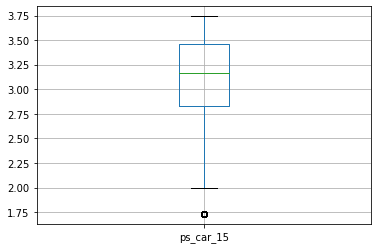

In [116]:
#Validating after removing outliers
df.boxplot(column = 'ps_car_15')

In [117]:
Q1 = df['ps_calc_04'].quantile(0.25)
Q3 = df['ps_calc_04'].quantile(0.75)
IQR = Q3 - Q1
Outliers24 = df[(df.ps_calc_04 < (Q1 - 1.5 * IQR)) | (df.ps_calc_04 > (Q3 + 1.5 * IQR))]

In [118]:
Outliers24

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
44           0          5              2          2              1   
72           0          1              2          1              0   
276          0          0              1          2              0   
298          0          0              1          7              1   
345          0          0              3          4              0   
...        ...        ...            ...        ...            ...   
594697       0          2              1          6              0   
594861       0          2              1          4              0   
594923       0          1              1          2              1   
595035       0          1              2          1              1   
595157       0          0              2          0              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
44                  0              0              1              0   
72                  0              1              0              0   
276                 0              1              0              0   
298                 0              0              1              0   
345                 0              1              0              0   
...               ...            ...            ...            ...   
594697              0              1              0              0   
594861              0              1              0              0   
594923              0              1              0              0   
595035              0              1              0              0   
595157              0              0              1              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
44                  0  ...           8           1           7           8   
72                  0  ...           8           3           5          12   
276                 0  ...           4           4           2           4   
298                 0  ...           8           1           1           8   
345                 0  ...           2           2           4          11   
...               ...  ...         ...         ...         ...         ...   
594697              0  ...           6           2           1          16   
594861              0  ...          11           3           2           7   
594923              0  ...           5           0           2           7   
595035              0  ...           6           1           0          11   
595157              0  ...          10           2           3           4   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
44                   0               1               1               0   
72                   1               1               1               0   
276                  0               1               1               0   
298                  0               1               0               0   
345                  0               1               1               1   
...                ...             ...             ...             ...   
594697               0               0               0               0   
594861               0               1               1               1   
594923               1               0               0               0   
595035               0               0               1               0   
595157               0               1               0               0   

        ps_calc_19_bin  ps_calc_20_bin  
44                   1               0  
72                   0               0  
276                  1               0  
298                  0               0  
345                  1               0  
...                ...             ...  
594697               1               0  
594861               0               0  
594923               0               0  
595035               0               0  
595157               0               0  

[6672 r

In [120]:
df.drop(Outliers24.index, axis = 0, inplace =True)

<AxesSubplot:>

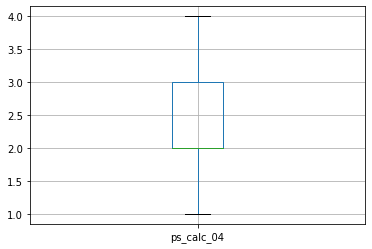

In [121]:
#Validating after removing outliers
df.boxplot(column = 'ps_calc_04')

In [122]:
Q1 = df['ps_calc_06'].quantile(0.25)
Q3 = df['ps_calc_06'].quantile(0.75)
IQR = Q3 - Q1
Outliers25 = df[(df.ps_calc_06 < (Q1 - 1.5 * IQR)) | (df.ps_calc_06 > (Q3 + 1.5 * IQR))]

In [123]:
Outliers25

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
2245         0          3              1          3              0   
3205         0          1              2          1              0   
3895         0          0              2          0              0   
5312         0          0              2          2              1   
5384         0          1              1          4              0   
...        ...        ...            ...        ...            ...   
573915       0          1              1          8              0   
576716       0          2              1          5              0   
580494       0          1              1          7              1   
587401       0          3              1          7              0   
588391       0          2              2          2              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
2245                0              1              0              0   
3205                0              1              0              0   
3895                0              1              0              0   
5312                0              0              1              0   
5384                0              1              0              0   
...               ...            ...            ...            ...   
573915              0              1              0              0   
576716              0              1              0              0   
580494              0              0              1              0   
587401              0              0              1              0   
588391              0              0              1              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
2245                0  ...           3           1           1           9   
3205                0  ...           5           2           4          14   
3895                0  ...           7           2           6          11   
5312                0  ...          10           2           1           7   
5384                0  ...           0           3           1           5   
...               ...  ...         ...         ...         ...         ...   
573915              0  ...           8           2           3           9   
576716              0  ...           6           3           6          10   
580494              0  ...           3           4           3           6   
587401              0  ...          10           0           5          11   
588391              0  ...           4           2           3           8   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
2245                 0               1               1               0   
3205                 0               1               0               0   
3895                 0               0               0               0   
5312                 0               0               0               0   
5384                 0               1               0               1   
...                ...             ...             ...             ...   
573915               0               1               1               0   
576716               0               0               1               0   
580494               0               0               1               0   
587401               0               1               1               0   
588391               0               1               1               1   

        ps_calc_19_bin  ps_calc_20_bin  
2245                 0               0  
3205                 1               0  
3895                 0               1  
5312                 1               0  
5384                 0               0  
...                ...             ...  
573915               1               1  
576716               1               0  
580494               0               0  
587401               0               0  
588391               0               0  

[208 ro

In [124]:
df.drop(Outliers25.index, axis = 0, inplace =True)

<AxesSubplot:>

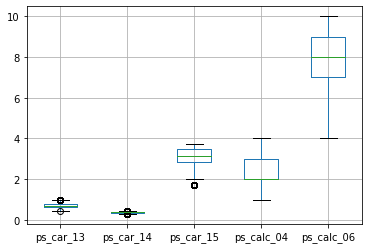

In [125]:
#Validating after removing outliers
df[['ps_car_13', 'ps_car_14', 'ps_car_15','ps_calc_04','ps_calc_06']].boxplot()

<AxesSubplot:>

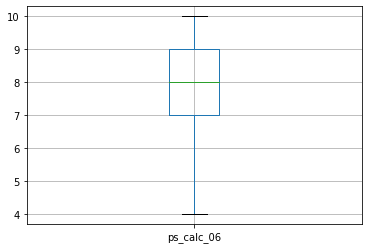

In [126]:
#Validating after removing outliers
df.boxplot(column = 'ps_calc_06')

In [127]:
Q1 = df['ps_calc_07'].quantile(0.25)
Q3 = df['ps_calc_07'].quantile(0.75)
IQR = Q3 - Q1
Outliers26 = df[(df.ps_calc_07 < (Q1 - 1.5 * IQR)) | (df.ps_calc_07 > (Q3 + 1.5 * IQR))]

In [128]:
Outliers26

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
11378        0          1              1          1              1   
13887        0          0              2          5              0   
66976        0          0              1          3              0   
68143        0          0              2          2              0   
70433        0          3              1          3              0   
...        ...        ...            ...        ...            ...   
568339       0          1              1          9              0   
570130       0          0              2          1              1   
570301       0          0              1          2              0   
574042       0          0              1          4              1   
587945       0          2              1          1              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
11378               0              0              1              0   
13887               0              1              0              0   
66976               0              1              0              0   
68143               0              1              0              0   
70433               0              1              0              0   
...               ...            ...            ...            ...   
568339              0              1              0              0   
570130              0              0              1              0   
570301              0              1              0              0   
574042              0              0              1              0   
587945              0              0              1              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
11378               0  ...           5           0           6           6   
13887               0  ...           6           2           2           9   
66976               0  ...           4           1           3           7   
68143               0  ...           8           1           2           3   
70433               0  ...           4           2           4           7   
...               ...  ...         ...         ...         ...         ...   
568339              0  ...           9           0           2           8   
570130              0  ...           7           0           2           4   
570301              0  ...           2           4           3           5   
574042              0  ...           6           3           1          10   
587945              0  ...           6           2           2          11   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
11378                0               1               0               0   
13887                0               0               0               1   
66976                0               0               1               0   
68143                0               1               1               1   
70433                1               1               1               1   
...                ...             ...             ...             ...   
568339               0               1               0               1   
570130               0               0               1               0   
570301               0               1               1               0   
574042               0               1               0               0   
587945               0               0               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
11378                0               0  
13887                0               0  
66976                0               0  
68143                0               0  
70433                1               0  
...                ...             ...  
568339               1               0  
570130               0               0  
570301               0               0  
574042               0               0  
587945               1               0  

[79 row

In [129]:
df.drop(Outliers26.index, axis = 0, inplace =True)

<AxesSubplot:>

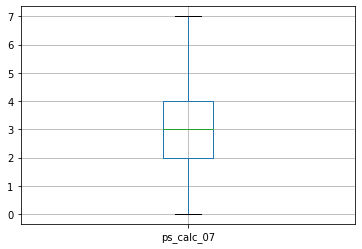

In [130]:
#Validating after removing outliers
df.boxplot(column = 'ps_calc_07')

In [131]:
Q1 = df['ps_calc_08'].quantile(0.25)
Q3 = df['ps_calc_08'].quantile(0.75)
IQR = Q3 - Q1
Outliers27 = df[(df.ps_calc_08 < (Q1 - 1.5 * IQR)) | (df.ps_calc_08 > (Q3 + 1.5 * IQR))]

In [132]:
Outliers27

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
9154         0          5              1          8              0   
19625        0          1              1          8              0   
19853        0          0              1          1              0   
20141        0          1              1          5              0   
20414        0          0              1          6              0   
...        ...        ...            ...        ...            ...   
569731       0          1              1          9              0   
572248       0          4              1          5              0   
575072       0          1              1          5              0   
586262       0          3              1          7              1   
588003       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
9154                0              1              0              0   
19625               0              1              0              0   
19853               0              1              0              0   
20141               0              1              0              0   
20414               0              1              0              0   
...               ...            ...            ...            ...   
569731              0              1              0              0   
572248              0              1              0              0   
575072              0              1              0              0   
586262              0              0              1              0   
588003              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
9154                0  ...           6           2           1           9   
19625               0  ...           6           0           4           2   
19853               0  ...           9           1           1           8   
20141               0  ...           6           4           2          11   
20414               0  ...           3           0           1           8   
...               ...  ...         ...         ...         ...         ...   
569731              0  ...           5           4           1           7   
572248              0  ...           7           2           2           9   
575072              0  ...           3           2           7           7   
586262              0  ...           5           1           3          12   
588003              0  ...           4           0           4           8   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
9154                 1               0               1               0   
19625                0               1               1               1   
19853                0               1               1               1   
20141                0               1               0               1   
20414                1               1               1               1   
...                ...             ...             ...             ...   
569731               0               1               1               1   
572248               0               1               1               0   
575072               0               1               1               0   
586262               0               1               0               0   
588003               0               0               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
9154                 0               0  
19625                0               0  
19853                1               0  
20141                0               1  
20414                0               0  
...                ...             ...  
569731               1               0  
572248               1               1  
575072               0               0  
586262               0               0  
588003               1               0  

[143 ro

In [133]:
df.drop(Outliers27.index, axis = 0, inplace =True)

<AxesSubplot:>

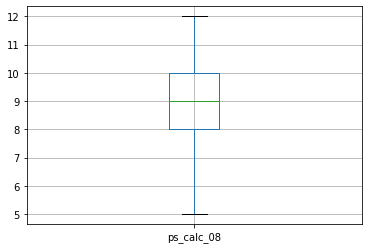

In [134]:
#Validating after removing outliers
df.boxplot(column = 'ps_calc_08')

In [135]:
Q1 = df['ps_calc_09'].quantile(0.25)
Q3 = df['ps_calc_09'].quantile(0.75)
IQR = Q3 - Q1
Outliers28 = df[(df.ps_calc_09 < (Q1 - 1.5 * IQR)) | (df.ps_calc_09 > (Q3 + 1.5 * IQR))]

In [136]:
Outliers28

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3834         0          3              1          5              0   
18992        0          2              1          2              1   
19058        0          0              1          1              0   
51789        0          0              2          0              0   
54492        0          0              1          3              0   
96179        0          1              1          5              0   
101608       0          3              1          6              0   
141738       0          1              1          2              0   
144950       0          0              1          5              0   
162336       0          1              1          9              0   
169930       0          2              1          7              0   
223046       0          1              1          6              0   
243944       0          1              1          4              0   
247681       0          1              2          1              0   
272381       0          5              1          2              0   
293653       0          3              1          9              0   
301031       0          0              3          8              1   
308632       0          0              1          2              0   
310434       0          1              2          2              1   
363390       0          1              2          3              1   
373143       0          1              1          4              0   
374058       0          1              1          5              0   
414144       0          0              1          5              0   
418929       0          4              1          5              0   
440749       0          0              1          6              0   
448068       0          1              1          3              0   
457456       0          0              1          5              1   
459982       0          1              1          3              1   
463591       0          3              1          2              0   
469921       0          1              1          7              1   
479926       0          2              1          8              0   
506703       0          2              2          4              1   
510620       0          2              1          3              0   
517316       0          1              2          1              1   
519486       0          5              1          2              0   
557609       0          2              1          5              0   
562456       0          0              1          1              0   
591109       0          1              1          2              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
3834                0              1              0              0   
18992               0              0              1              0   
19058               0              1              0              0   
51789               0              1              0              0   
54492               0              1              0              0   
96179               0              1              0              0   
101608              0              1              0              0   
141738              0              1              0              0   
144950              0              1              0              0   
162336              0              1              0              0   
169930              0              1              0              0   
223046              0              1              0              0   
243944              0              1              0              0   
247681              0              1              0              0   
272381              0              1              0              0   
293653              0              1              0              0   
301031              0              1              0              0   
308632           

In [137]:
df.drop(Outliers28.index, axis = 0, inplace =True)

<AxesSubplot:>

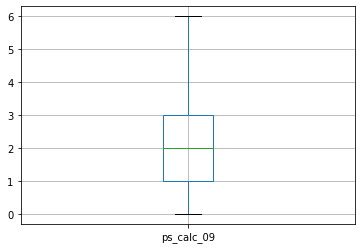

In [138]:
#Validating after removing outliers
df.boxplot(column = 'ps_calc_09')

In [139]:
Q1 = df['ps_calc_10'].quantile(0.25)
Q3 = df['ps_calc_10'].quantile(0.75)
IQR = Q3 - Q1
Outliers29 = df[(df.ps_calc_10 < (Q1 - 1.5 * IQR)) | (df.ps_calc_10 > (Q3 + 1.5 * IQR))]

In [140]:
Outliers29

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
20           0          0              1          2              0   
1574         0          0              1          9              1   
3183         0          0              1          4              0   
6338         0          0              1          3              1   
6876         0          0              1          4              0   
...        ...        ...            ...        ...            ...   
590303       0          0              1          6              0   
590886       0          4              2          4              1   
592837       0          0              2          4              0   
593554       0          2              2          2              1   
593903       0          0              3          3              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
20                  0              1              0              0   
1574                0              1              0              0   
3183                0              1              0              0   
6338                0              1              0              0   
6876                0              1              0              0   
...               ...            ...            ...            ...   
590303              0              1              0              0   
590886              0              1              0              0   
592837              0              1              0              0   
593554              0              0              1              0   
593903              0              0              1              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
20                  0  ...           7           2           2           4   
1574                0  ...           5           2           5           7   
3183                0  ...           5           2           2           8   
6338                0  ...           7           0           2           9   
6876                0  ...           3           1           5           9   
...               ...  ...         ...         ...         ...         ...   
590303              0  ...           6           0           2          16   
590886              0  ...           6           2           1          11   
592837              0  ...           6           2           0           8   
593554              0  ...           7           1           1           6   
593903              0  ...           4           3           1           9   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
20                   0               1               0               0   
1574                 0               1               1               0   
3183                 0               0               1               1   
6338                 1               1               0               0   
6876                 0               1               1               0   
...                ...             ...             ...             ...   
590303               0               1               1               0   
590886               0               0               1               1   
592837               1               1               0               0   
593554               0               1               0               0   
593903               0               1               1               1   

        ps_calc_19_bin  ps_calc_20_bin  
20                   1               0  
1574                 0               1  
3183                 1               0  
6338                 1               0  
6876                 0               1  
...                ...             ...  
590303               1               0  
590886               0               0  
592837               0               0  
593554               1               0  
593903               1               0  

[590 ro

In [141]:
df.drop(Outliers29.index, axis = 0, inplace =True)

<AxesSubplot:>

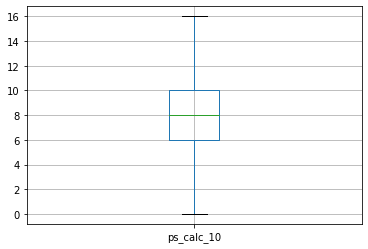

In [142]:
#Validating after removing outliers
df.boxplot(column = 'ps_calc_10')

In [143]:
Q1 = df['ps_calc_11'].quantile(0.25)
Q3 = df['ps_calc_11'].quantile(0.75)
IQR = Q3 - Q1
Outliers_29 = df[(df.ps_calc_11 < (Q1 - 1.5 * IQR)) | (df.ps_calc_11 > (Q3 + 1.5 * IQR))]

In [144]:
Outliers_29

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
184          0          2              1          1              0   
478          0          2              1          3              0   
732          0          0              2          7              0   
1839         0          0              2          1              1   
3114         0          0              1          6              1   
...        ...        ...            ...        ...            ...   
592625       0          0              1          8              1   
593602       0          3              2          2              1   
594030       0          3              1          3              0   
594351       0          1              1          8              1   
595001       0          4              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
184                 0              1              0              0   
478                 0              1              0              0   
732                 0              1              0              0   
1839                0              1              0              0   
3114                0              0              1              0   
...               ...            ...            ...            ...   
592625              0              1              0              0   
593602              0              1              0              0   
594030              0              1              0              0   
594351              0              0              1              0   
595001              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
184                 0  ...          13           4           3          13   
478                 0  ...          12           1           2           6   
732                 0  ...          12           0           4          10   
1839                0  ...          13           1           0           7   
3114                0  ...          12           3           1          12   
...               ...  ...         ...         ...         ...         ...   
592625              0  ...          12           4           2          11   
593602              0  ...          13           0           4           5   
594030              0  ...          13           2           1           5   
594351              0  ...          12           2           5           9   
595001              0  ...          12           3           4           4   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
184                  0               1               1               0   
478                  0               1               0               1   
732                  0               1               0               1   
1839                 0               1               1               0   
3114                 0               1               0               0   
...                ...             ...             ...             ...   
592625               0               1               1               0   
593602               0               1               0               1   
594030               0               1               1               0   
594351               0               1               1               0   
595001               0               1               0               0   

        ps_calc_19_bin  ps_calc_20_bin  
184                  1               0  
478                  0               0  
732                  1               0  
1839                 0               0  
3114                 0               0  
...                ...             ...  
592625               0               0  
593602               1               0  
594030               0               1  
594351               1               0  
595001               1               0  

[991 ro

In [145]:
df.drop(Outliers_29.index, axis = 0, inplace =True)

<AxesSubplot:>

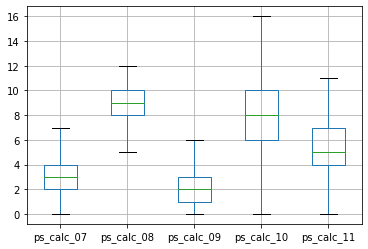

In [146]:
#Validating after removing outliers
df[['ps_calc_07', 'ps_calc_08', 'ps_calc_09','ps_calc_10','ps_calc_11']].boxplot()

<AxesSubplot:>

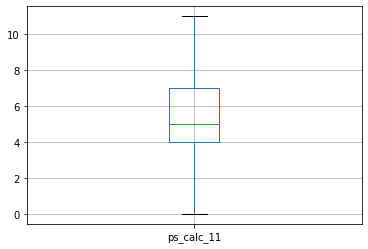

In [147]:
#Validating after removing outliers
df.boxplot(column = 'ps_calc_11')

In [148]:
Q1 = df['ps_calc_12'].quantile(0.25)
Q3 = df['ps_calc_12'].quantile(0.75)
IQR = Q3 - Q1
Outliers30 = df[(df.ps_calc_12 < (Q1 - 1.5 * IQR)) | (df.ps_calc_12 > (Q3 + 1.5 * IQR))]

In [149]:
Outliers30

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
199          0          1              1          5              1   
244          0          1              2          0              0   
288          0          0              1          2              0   
601          0          1              1          8              1   
693          0          1              1          3              1   
...        ...        ...            ...        ...            ...   
594809       0          1              2          1              1   
594862       0          5              1          6              0   
594863       1          0              2          0              0   
595165       0          2              1          1              0   
595202       0          4              1          3              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
199                 0              1              0              0   
244                 0              1              0              0   
288                 0              1              0              0   
601                 0              1              0              0   
693                 0              0              1              0   
...               ...            ...            ...            ...   
594809              0              1              0              0   
594862              0              1              0              0   
594863              0              1              0              0   
595165              0              1              0              0   
595202              0              0              1              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
199                 0  ...           9           4           4          13   
244                 0  ...           7           4           5           9   
288                 0  ...           8           4           2           7   
601                 0  ...           5           4           7           7   
693                 0  ...           7           5           2           7   
...               ...  ...         ...         ...         ...         ...   
594809              0  ...           7           4           2          10   
594862              0  ...           5           5           0           6   
594863              0  ...           4           4           2          11   
595165              0  ...           7           5           2           5   
595202              0  ...          11           6           2           6   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
199                  1               1               1               1   
244                  0               1               1               1   
288                  0               0               0               0   
601                  0               1               1               0   
693                  0               0               1               0   
...                ...             ...             ...             ...   
594809               0               0               1               0   
594862               0               1               1               0   
594863               0               1               0               1   
595165               0               0               1               1   
595202               0               1               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
199                  1               0  
244                  0               0  
288                  0               0  
601                  0               0  
693                  0               0  
...                ...             ...  
594809               0               0  
594862               1               0  
594863               0               1  
595165               1               1  
595202               1               0  

[5618 r

In [150]:
df.drop(Outliers30.index, axis = 0, inplace =True)

<AxesSubplot:>

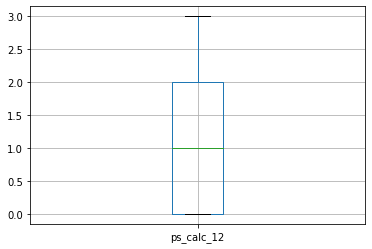

In [151]:
#Validating after removing outliers
df.boxplot(column = 'ps_calc_12')

In [152]:
Q1 = df['ps_calc_13'].quantile(0.25)
Q3 = df['ps_calc_13'].quantile(0.75)
IQR = Q3 - Q1
Outliers31 = df[(df.ps_calc_13 < (Q1 - 1.5 * IQR)) | (df.ps_calc_13 > (Q3 + 1.5 * IQR))]

In [153]:
Outliers31

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
2537         1          2              1          4              0   
2949         0          5              1          4              0   
2950         0          1              1          1              1   
3402         0          0              1          1              0   
3701         0          2              1          7              1   
...        ...        ...            ...        ...            ...   
593662       0          1              3          8              1   
594321       0          6              1          9              0   
594797       0          1              1          3              0   
594867       0          0              1          4              1   
595189       0          3              1          9              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
2537                0              1              0              0   
2949                0              1              0              0   
2950                0              1              0              0   
3402                0              1              0              0   
3701                0              0              1              0   
...               ...            ...            ...            ...   
593662              0              0              1              0   
594321              0              1              0              0   
594797              0              1              0              0   
594867              0              1              0              0   
595189              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
2537                0  ...           3           1           8          17   
2949                0  ...           2           2           8           8   
2950                0  ...           6           1           8           3   
3402                0  ...           3           1           8           7   
3701                0  ...           6           1           9           6   
...               ...  ...         ...         ...         ...         ...   
593662              0  ...           2           0           8           6   
594321              0  ...           3           2           9           7   
594797              0  ...           4           0           9           9   
594867              0  ...           5           0           9           6   
595189              0  ...           7           0           8           4   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
2537                 0               1               1               0   
2949                 0               1               0               0   
2950                 0               1               0               1   
3402                 1               0               0               0   
3701                 0               1               1               0   
...                ...             ...             ...             ...   
593662               0               0               1               0   
594321               0               1               1               1   
594797               0               1               1               1   
594867               0               0               0               1   
595189               0               1               0               1   

        ps_calc_19_bin  ps_calc_20_bin  
2537                 0               0  
2949                 0               1  
2950                 1               0  
3402                 1               1  
3701                 0               0  
...                ...             ...  
593662               1               0  
594321               1               0  
594797               0               0  
594867               0               0  
595189               1               0  

[772 ro

In [154]:
df.drop(Outliers31.index, axis = 0, inplace =True)

<AxesSubplot:>

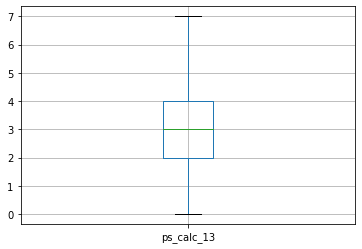

In [155]:
#Validating after removing outliers
df.boxplot(column = 'ps_calc_13')

In [156]:
Q1 = df['ps_calc_14'].quantile(0.25)
Q3 = df['ps_calc_14'].quantile(0.75)
IQR = Q3 - Q1
Outliers32 = df[(df.ps_calc_14 < (Q1 - 1.5 * IQR)) | (df.ps_calc_14 > (Q3 + 1.5 * IQR))]

In [157]:
Outliers32

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
35           0          2              1          1              1   
65           1          6              1          3              0   
107          0          1              1          5              0   
453          0          1              1          7              0   
466          0          0              1          5              0   
...        ...        ...            ...        ...            ...   
594330       1          3              1          2              1   
594712       0          5              1          2              1   
594824       0          5              1          7              0   
595008       0          2              1          3              1   
595132       0          2              1          3              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
35                  0              1              0              0   
65                  0              0              1              0   
107                 0              1              0              0   
453                 0              1              0              0   
466                 0              1              0              0   
...               ...            ...            ...            ...   
594330              0              0              1              0   
594712              0              1              0              0   
594824              0              1              0              0   
595008              0              0              1              0   
595132              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
35                  0  ...           9           1           3          14   
65                  0  ...           3           2           3          16   
107                 0  ...           7           0           4          14   
453                 0  ...           2           3           0          15   
466                 0  ...           4           0           2          14   
...               ...  ...         ...         ...         ...         ...   
594330              0  ...           8           1           3          16   
594712              0  ...           4           0           2          14   
594824              0  ...           5           3           4          16   
595008              0  ...           8           3           1          14   
595132              0  ...           3           2           5          16   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
35                   0               0               0               0   
65                   0               0               0               0   
107                  0               0               1               0   
453                  0               1               1               0   
466                  0               1               1               1   
...                ...             ...             ...             ...   
594330               0               0               0               0   
594712               0               1               1               0   
594824               0               1               0               0   
595008               0               1               0               1   
595132               0               1               0               1   

        ps_calc_19_bin  ps_calc_20_bin  
35                   1               0  
65                   0               0  
107                  1               0  
453                  0               0  
466                  0               0  
...                ...             ...  
594330               0               0  
594712               1               0  
594824               0               0  
595008               1               0  
595132               0               0  

[2312 r

In [158]:
df.drop(Outliers32.index, axis = 0, inplace =True)

<AxesSubplot:>

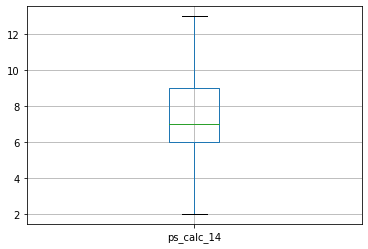

In [159]:
#Validating after removing outliers
df.boxplot(column = 'ps_calc_14')

In [160]:
Q1 = df['ps_calc_15_bin'].quantile(0.25)
Q3 = df['ps_calc_15_bin'].quantile(0.75)
IQR = Q3 - Q1
Outliers33 = df[(df.ps_calc_15_bin < (Q1 - 1.5 * IQR)) | (df.ps_calc_15_bin > (Q3 + 1.5 * IQR))]

In [161]:
Outliers33

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
7            0          5              1          4              0   
67           0          4              2          1              1   
84           0          4              1          2              1   
119          0          1              1          5              1   
139          0          0              2          0              0   
...        ...        ...            ...        ...            ...   
595011       0          0              1          4              0   
595077       0          1              1          1              1   
595159       0          0              1          3              0   
595163       0          2              2          3              1   
595205       0          0              3          6              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
7                   0              1              0              0   
67                  0              0              1              0   
84                  0              0              1              0   
119                 0              0              1              0   
139                 0              1              0              0   
...               ...            ...            ...            ...   
595011              0              1              0              0   
595077              0              0              1              0   
595159              0              1              0              0   
595163              0              1              0              0   
595205              0              0              1              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
7                   0  ...           7           1           3           6   
67                  0  ...           4           2           1          10   
84                  0  ...           4           0           3          10   
119                 0  ...           3           1           4           7   
139                 0  ...           8           2           2           7   
...               ...  ...         ...         ...         ...         ...   
595011              0  ...           3           1           4           4   
595077              0  ...           5           1           1           7   
595159              0  ...           9           0           2          10   
595163              0  ...           7           0           3          11   
595205              0  ...           7           1           2           6   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
7                    1               0               1               0   
67                   1               1               1               1   
84                   1               1               1               0   
119                  1               0               0               0   
139                  1               0               1               0   
...                ...             ...             ...             ...   
595011               1               1               0               1   
595077               1               0               1               0   
595159               1               0               1               1   
595163               1               1               0               0   
595205               1               0               1               0   

        ps_calc_19_bin  ps_calc_20_bin  
7                    1               0  
67                   0               0  
84                   1               0  
119                  0               0  
139                  0               0  
...                ...             ...  
595011               1               0  
595077               0               0  
595159               1               0  
595163               0               1  
595205               0               0  

[10567 

In [162]:
df.drop(Outliers33.index, axis = 0, inplace =True)

<AxesSubplot:>

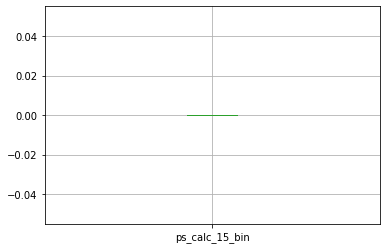

In [163]:
#Validating after removing outliers
df.boxplot(column = 'ps_calc_15_bin')

In [164]:
Q1 = df['ps_calc_20_bin'].quantile(0.25)
Q3 = df['ps_calc_20_bin'].quantile(0.75)
IQR = Q3 - Q1
Outliers34 = df[(df.ps_calc_20_bin < (Q1 - 1.5 * IQR)) | (df.ps_calc_20_bin > (Q3 + 1.5 * IQR))]

In [165]:
Outliers34

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
42           0          1              1          9              0   
90           0          0              3          7              0   
117          0          1              2          2              1   
128          0          0              1          2              0   
484          0          2              2          1              1   
...        ...        ...            ...        ...            ...   
595079       0          7              1         10              1   
595090       0          0              1          2              1   
595109       0          2              1          3              1   
595155       0          4              1          3              0   
595171       0          1              2          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
42                  0              1              0              0   
90                  0              1              0              0   
117                 0              1              0              0   
128                 0              1              0              0   
484                 0              0              1              0   
...               ...            ...            ...            ...   
595079              0              0              1              0   
595090              0              0              1              0   
595109              0              1              0              0   
595155              0              1              0              0   
595171              0              1              0              0   

        ps_ind_09_bin  ...  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  \
42                  0  ...           0           0           2           5   
90                  0  ...           6           1           3           8   
117                 0  ...           5           1           5          11   
128                 0  ...           5           2           3           7   
484                 0  ...           3           3           5           8   
...               ...  ...         ...         ...         ...         ...   
595079              0  ...           8           2           3           7   
595090              0  ...           6           2           2           8   
595109              0  ...           6           2           4           9   
595155              0  ...           3           2           3           7   
595171              0  ...          11           1           2           9   

        ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
42                   0               1               1               0   
90                   0               1               0               1   
117                  0               0               1               0   
128                  0               1               0               0   
484                  0               1               0               1   
...                ...             ...             ...             ...   
595079               0               0               0               0   
595090               0               1               0               0   
595109               0               1               1               1   
595155               0               0               0               0   
595171               0               1               0               0   

        ps_calc_19_bin  ps_calc_20_bin  
42                   1               1  
90                   0               1  
117                  1               1  
128                  0               1  
484                  0               1  
...                ...             ...  
595079               1               1  
595090               1               1  
595109               0               1  
595155               0               1  
595171               0               1  

[11633 

In [166]:
df.drop(Outliers34.index, axis = 0, inplace =True)

<AxesSubplot:>

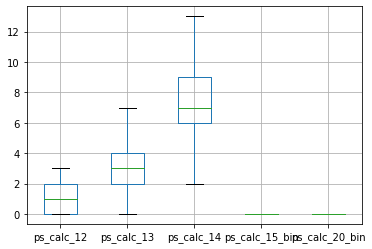

In [167]:
#Validating after removing outliers
df[['ps_calc_12', 'ps_calc_13', 'ps_calc_14','ps_calc_15_bin','ps_calc_20_bin']].boxplot()

<AxesSubplot:>

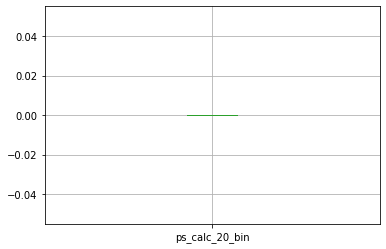

In [168]:
#Validating after removing outliers
df.boxplot(column = 'ps_calc_20_bin')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64083 entries, 3 to 595209
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   target          64083 non-null  int64  
 1   ps_ind_01       64083 non-null  int64  
 2   ps_ind_02_cat   64083 non-null  int64  
 3   ps_ind_03       64083 non-null  int64  
 4   ps_ind_04_cat   64083 non-null  int64  
 5   ps_ind_05_cat   64083 non-null  int64  
 6   ps_ind_06_bin   64083 non-null  int64  
 7   ps_ind_07_bin   64083 non-null  int64  
 8   ps_ind_08_bin   64083 non-null  int64  
 9   ps_ind_09_bin   64083 non-null  int64  
 10  ps_ind_10_bin   64083 non-null  int64  
 11  ps_ind_11_bin   64083 non-null  int64  
 12  ps_ind_12_bin   64083 non-null  int64  
 13  ps_ind_13_bin   64083 non-null  int64  
 14  ps_ind_14       64083 non-null  int64  
 15  ps_ind_15       64083 non-null  int64  
 16  ps_ind_16_bin   64083 non-null  int64  
 17  ps_ind_17_bin   64083 non-null

In [170]:
df.ps_ind_01.value_counts()

0    22200
1    21261
2     9221
3     4664
5     3432
4     2283
6      610
7      412
Name: ps_ind_01, dtype: int64

In [171]:
df.ps_ind_02_cat.value_counts()

1    47366
2    14608
3     2109
Name: ps_ind_02_cat, dtype: int64

In [172]:
df.ps_calc_02.value_counts()

0.0    6518
0.8    6458
0.5    6454
0.6    6451
0.4    6437
0.7    6388
0.2    6384
0.3    6337
0.9    6336
0.1    6320
Name: ps_calc_02, dtype: int64

In [173]:
df.ps_calc_03.value_counts()

0.6    6574
0.1    6556
0.9    6434
0.8    6429
0.2    6395
0.5    6358
0.7    6354
0.0    6343
0.4    6329
0.3    6311
Name: ps_calc_03, dtype: int64

In [174]:
df.ps_calc_04.value_counts()

2    22270
3    20175
1    12498
4     9140
Name: ps_calc_04, dtype: int64

In [175]:
df.ps_calc_05.value_counts()

2    20955
1    18388
3    12914
0     6621
4     4343
5      797
6       65
Name: ps_calc_05, dtype: int64

In [176]:
df.ps_calc_06.value_counts()

8     18762
7     15062
9     13945
6      8035
10     4707
5      2892
4       680
Name: ps_calc_06, dtype: int64

In [177]:
df.ps_calc_07.value_counts()

3    17511
2    15014
4    13122
1     7565
5     6614
6     2130
0     1646
7      481
Name: ps_calc_07, dtype: int64

In [178]:
df.ps_calc_08.value_counts()

9     16407
10    16049
8     11257
11     9896
7      5408
12     2682
6      1879
5       505
Name: ps_calc_08, dtype: int64

In [179]:
df.ps_calc_09.value_counts()

2    19688
3    16439
1    13135
4     8244
0     3721
5     2451
6      405
Name: ps_calc_09, dtype: int64

In [180]:
df.ps_calc_10.value_counts()

8     8885
7     8453
9     8329
10    6995
6     6977
11    5326
5     4993
12    3731
4     3033
13    2502
14    1495
3     1418
15     866
2      497
16     455
1      108
0       20
Name: ps_calc_10, dtype: int64

In [181]:
df.ps_calc_11.value_counts()

5     11330
4     10173
6     10169
7      7891
3      7529
8      5267
2      4157
9      3185
10     1813
1      1504
11      843
0       222
Name: ps_calc_11, dtype: int64

In [182]:
df.ps_calc_12.value_counts()

1    23263
2    16591
0    16186
3     8043
Name: ps_calc_12, dtype: int64

In [183]:
df.ps_calc_13.value_counts()

2    15197
3    14203
1    10528
4    10521
5     5898
0     3683
6     2854
7     1199
Name: ps_calc_13, dtype: int64

In [184]:
df.ps_calc_14.value_counts()

7     9446
8     9239
6     8904
9     7598
5     7008
10    5834
4     4711
11    3952
3     2532
12    2416
13    1460
2      983
Name: ps_calc_14, dtype: int64

In [185]:
df.ps_calc_15_bin.value_counts()

0    64083
Name: ps_calc_15_bin, dtype: int64

In [186]:
df.ps_calc_16_bin.value_counts()

1    40198
0    23885
Name: ps_calc_16_bin, dtype: int64

In [187]:
df.ps_calc_17_bin.value_counts()

1    35679
0    28404
Name: ps_calc_17_bin, dtype: int64

In [188]:
df.ps_calc_18_bin.value_counts()

0    45594
1    18489
Name: ps_calc_18_bin, dtype: int64

In [189]:
df.ps_calc_19_bin.value_counts()

0    41511
1    22572
Name: ps_calc_19_bin, dtype: int64

In [190]:
df.ps_calc_20_bin.value_counts()

0    64083
Name: ps_calc_20_bin, dtype: int64

In [191]:
df.ps_car_01_cat.value_counts()

7     26917
11    18930
6      7199
10     4965
4      1960
8      1213
5       968
3       848
9       789
2       241
1        53
Name: ps_car_01_cat, dtype: int64

In [192]:
df.ps_car_02_cat.value_counts()

1    64083
Name: ps_car_02_cat, dtype: int64

In [193]:
df.ps_car_03_cat.value_counts()

-1    52810
 0     6148
 1     5125
Name: ps_car_03_cat, dtype: int64

In [194]:
df.ps_car_04_cat.value_counts()

0    64083
Name: ps_car_04_cat, dtype: int64

In [195]:
df.ps_car_05_cat.value_counts()

-1    39105
 0    13292
 1    11686
Name: ps_car_05_cat, dtype: int64

In [196]:
df.ps_car_06_cat.value_counts()

1     16728
11    15685
0     14507
14     7504
6      3176
4      2611
7      1574
10     1470
9       316
15      254
3       187
5        61
17       10
Name: ps_car_06_cat, dtype: int64

In [197]:
df.ps_car_07_cat.value_counts()

1    64083
Name: ps_car_07_cat, dtype: int64

In [198]:
df.ps_car_08_cat.value_counts()

1    64083
Name: ps_car_08_cat, dtype: int64

In [199]:
df.ps_car_09_cat.value_counts()

 2    40412
 0    19469
 1     2433
 3     1608
 4      123
-1       38
Name: ps_car_09_cat, dtype: int64

In [200]:
df.ps_car_10_cat.value_counts()

1    64083
Name: ps_car_10_cat, dtype: int64

In [201]:
df.ps_car_11.value_counts()

3    38916
2    16024
1     9143
Name: ps_car_11, dtype: int64

In [202]:
df.ps_car_11_cat.value_counts()

103    4653
64     4226
104    3778
87     3173
10     2344
       ... 
63       35
97       26
33       17
8         4
72        1
Name: ps_car_11_cat, Length: 77, dtype: int64

In [203]:
df.ps_car_12.value_counts()

0.316228    29238
0.374166    12629
0.400000    11431
0.316070     3313
0.424264     2510
0.447214     1370
0.360555      427
0.399875      403
0.423792      401
0.387298      327
0.399500      313
0.446990      202
0.315595      178
0.399750      171
0.315278      144
0.399375      106
0.423674      105
0.368782      102
0.445870       79
0.408412       76
0.398372       70
0.446878       61
0.423556       57
0.435890       45
0.447102       40
0.445421       38
0.394715       37
0.445982       35
0.397240       24
0.422019       24
0.412311       23
0.397492       20
0.315753       16
0.421782       15
0.352420       14
0.424028       12
0.417971        6
0.435660        6
0.398999        5
0.468828        3
0.398623        3
0.445533        2
0.469042        1
0.386911        1
Name: ps_car_12, dtype: int64

In [204]:
df.ps_calc_13.value_counts()

2    15197
3    14203
1    10528
4    10521
5     5898
0     3683
6     2854
7     1199
Name: ps_calc_13, dtype: int64

In [205]:
df.ps_car_14.value_counts()

0.358329    4168
0.361525    3160
0.361939    2521
0.368782    2065
0.388716    1984
            ... 
0.382492       1
0.350999       1
0.360832       1
0.424853       1
0.338674       1
Name: ps_car_14, Length: 365, dtype: int64

In [206]:
df.ps_car_15.value_counts()

3.464102    8905
3.162278    8844
3.316625    8804
2.828427    7723
3.605551    6806
3.000000    6726
2.645751    5224
2.449490    3459
2.236068    3109
2.000000    2111
1.732051    1886
3.741657     486
Name: ps_car_15, dtype: int64

In [207]:
df.ps_ind_01.value_counts()

0    22200
1    21261
2     9221
3     4664
5     3432
4     2283
6      610
7      412
Name: ps_ind_01, dtype: int64

In [208]:
df.ps_ind_02_cat.value_counts()

1    47366
2    14608
3     2109
Name: ps_ind_02_cat, dtype: int64

In [209]:
df.ps_ind_03.value_counts()

2     13020
3     10184
1      9252
4      7425
5      5963
6      5061
7      4470
8      3252
9      2033
0      1605
10     1055
11      763
Name: ps_ind_03, dtype: int64

In [210]:
df.ps_ind_04_cat.value_counts()

0    38844
1    25239
Name: ps_ind_04_cat, dtype: int64

In [211]:
df.ps_ind_05_cat.value_counts()

0    64083
Name: ps_ind_05_cat, dtype: int64

In [212]:
df.ps_ind_06_bin.value_counts()

1    47427
0    16656
Name: ps_ind_06_bin, dtype: int64

In [213]:
df.ps_ind_07_bin.value_counts()

0    47427
1    16656
Name: ps_ind_07_bin, dtype: int64

In [214]:
df.ps_ind_08_bin.value_counts()

0    64083
Name: ps_ind_08_bin, dtype: int64

In [215]:
df.ps_ind_09_bin.value_counts()

0    64083
Name: ps_ind_09_bin, dtype: int64

In [216]:
df.ps_ind_10_bin.value_counts()

0    64083
Name: ps_ind_10_bin, dtype: int64

In [217]:
df.ps_ind_11_bin.value_counts()

0    64083
Name: ps_ind_11_bin, dtype: int64

In [218]:
df.ps_ind_12_bin.value_counts()

0    64083
Name: ps_ind_12_bin, dtype: int64

In [219]:
df.ps_ind_13_bin.value_counts()

0    64083
Name: ps_ind_13_bin, dtype: int64

In [220]:
df.ps_ind_13_bin.value_counts()

0    64083
Name: ps_ind_13_bin, dtype: int64

In [221]:
df.ps_ind_14.value_counts()

0    64083
Name: ps_ind_14, dtype: int64

In [222]:
df.ps_ind_15.value_counts()

8     6723
7     6568
10    6558
11    5967
6     5624
4     5113
9     4846
5     4614
12    4578
3     4039
0     3381
13    2770
2     2069
1     1233
Name: ps_ind_15, dtype: int64

In [223]:
df.ps_ind_16_bin.value_counts()

1    47920
0    16163
Name: ps_ind_16_bin, dtype: int64

In [224]:
df.ps_ind_17_bin.value_counts()

0    64083
Name: ps_ind_17_bin, dtype: int64

In [225]:
df.ps_ind_18_bin.value_counts()

0    52863
1    11220
Name: ps_ind_18_bin, dtype: int64

In [226]:
df.ps_reg_01.value_counts()

0.9    21595
0.7     9520
0.6     8247
0.4     7616
0.8     6316
0.5     5261
0.3     2996
0.0     2467
0.1       39
0.2       26
Name: ps_reg_01, dtype: int64

In [227]:
df.ps_reg_02.value_counts()

0.2    15591
0.0    12073
0.3    11799
0.4     7918
0.5     4815
0.6     3694
0.1     2695
0.7     2253
0.8     1868
0.9     1377
Name: ps_reg_02, dtype: int64

In [228]:
df.ps_reg_03.value_counts()

0.633936    134
0.587899    123
0.617960    117
0.557898    116
0.680074    112
           ... 
1.183744      1
1.277204      1
1.369306      1
1.335337      1
1.191638      1
Name: ps_reg_03, Length: 2728, dtype: int64

In [229]:
df.target.value_counts()

0    62444
1     1639
Name: target, dtype: int64

In [ ]:
# target feature is not in the balanced manner. Will apply SMOTE

In [292]:
df.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      

In [311]:
df[df['ps_ind_01'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [303]:
df[df['ps_ind_02_cat'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [304]:
df[df['ps_ind_03'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [306]:
df[df['ps_ind_04_cat'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [312]:
df[df['ps_ind_05_cat'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [313]:
df[df['ps_ind_06_bin'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [314]:
df[df['ps_ind_07_bin'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [315]:
df[df['ps_ind_08_bin'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [316]:
df[df['ps_ind_09_bin'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [317]:
df[df['ps_calc_11'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [318]:
df[df['ps_calc_12'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [319]:
df[df['ps_calc_13'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [320]:
df[df['ps_calc_14'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [321]:
df[df['ps_calc_15_bin'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [322]:
df[df['ps_calc_16_bin'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [323]:
df[df['ps_calc_17_bin'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [324]:
df[df['ps_calc_18_bin'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [325]:
df[df['ps_calc_19_bin'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [326]:
df[df['ps_calc_20_bin'] == -1]

Empty DataFrame
Columns: [target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

[0 rows x 58 columns]

In [230]:
df.isnull().values.any()

False

In [231]:
def identify_nans(df):
    null_count = [sum(df[x].isnull())  for x in df.columns]
    result = pd.DataFrame({'Column_name': df.columns,  
                 'Existence_Of_NULL': [any(df[x].isnull()) for x in df.columns],
                 'Nulls_Count':null_count,
                  'Nulls_Percentage': list(np.array(null_count) * 100 / df.shape[0])
                })
    return result

In [232]:
identify_nans(df)

Column_name  Existence_Of_NULL  Nulls_Count  Nulls_Percentage
0           target              False            0               0.0
1        ps_ind_01              False            0               0.0
2    ps_ind_02_cat              False            0               0.0
3        ps_ind_03              False            0               0.0
4    ps_ind_04_cat              False            0               0.0
5    ps_ind_05_cat              False            0               0.0
6    ps_ind_06_bin              False            0               0.0
7    ps_ind_07_bin              False            0               0.0
8    ps_ind_08_bin              False            0               0.0
9    ps_ind_09_bin              False            0               0.0
10   ps_ind_10_bin              False            0               0.0
11   ps_ind_11_bin              False            0               0.0
12   ps_ind_12_bin              False            0               0.0
13   ps_ind_13_bin              False            0               0.0
14       ps_ind_14              False            0               0.0
15       ps_ind_15              False            0               0.0
16   ps_ind_16_bin              False            0               0.0
17   ps_ind_17_bin              False            0               0.0
18   ps_ind_18_bin              False            0               0.0
19       ps_reg_01              False            0               0.0
20       ps_reg_02              False            0               0.0
21       ps_reg_03              False            0               0.0
22   ps_car_01_cat              False            0               0.0
23   ps_car_02_cat              False            0               0.0
24   ps_car_03_cat              False            0               0.0
25   ps_car_04_cat              False            0               0.0
26   ps_car_05_cat              False            0               0.0
27   ps_car_06_cat              False            0               0.0
28   ps_car_07_cat              False            0               0.0
29   ps_car_08_cat              False            0               0.0
30   ps_car_09_cat              False            0               0.0
31   ps_car_10_cat              False            0               0.0
32   ps_car_11_cat              False            0               0.0
33       ps_car_11              False            0               0.0
34       ps_car_12              False            0               0.0
35       ps_car_13              False            0               0.0
36       ps_car_14              False            0               0.0
37       ps_car_15              False            0               0.0
38      ps_calc_01              False            0               0.0
39      ps_calc_02              False            0               0.0
40      ps_calc_03              False            0               0.0
41      ps_calc_04              False            0               0.0
42      ps_calc_05              False            0               0.0
43      ps_calc_06              False            0               0.0
44      ps_calc_07              False            0               0.0
45      ps_calc_08              False            0               0.0
46      ps_calc_09              False            0               0.0
47      ps_calc_10              False            0               0.0
48      ps_calc_11              False            0               0.0
49      ps_calc_12              False            0               0.0
50      ps_calc_13              False            0               0.0
51      ps_calc_14              False            0               0.0
52  ps_calc_15_bin              False            0               0.0
53  ps_calc_16_bin              False            0               0.0
54  ps_calc_17_bin              False            0               0.0
55  ps_calc_18_bin              False            0               0.0
56  ps_calc_19_bin              False            0               0.0
57  p

In [ ]:
Inferences: It is noted that there is no null values found in the datasets.

In [ ]:
Inferences: PCA: Has it is not mentioned, Its not applied to reduce the dimensionality of the dataset.

In [233]:
def get_frequency(dataframe, category):
    result = {'category':[],
              'Length':[]}
               
    for group, group_data in dataframe.groupby(category):   
        result['category'].append(group)
        result['Length'].append(len(group_data))
        
    return pd.DataFrame(result)

<AxesSubplot:>

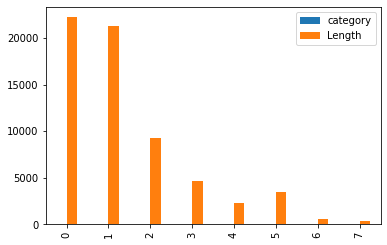

In [234]:
pt_frequency = get_frequency(df, 'ps_ind_01')
pt_frequency.plot(kind = 'bar')

<AxesSubplot:title={'center':'Distribution of PS Car Category Values'}, xlabel='category'>

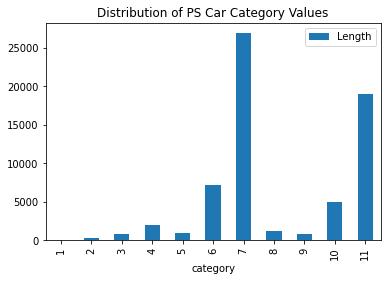

In [236]:
pt_frequency = get_frequency(df, 'ps_car_01_cat')
pt_frequency.set_index('category', inplace=True)
pt_frequency.plot(kind = 'bar', title = 'Distribution of PS Car Category Values')

<AxesSubplot:ylabel='Frequency'>

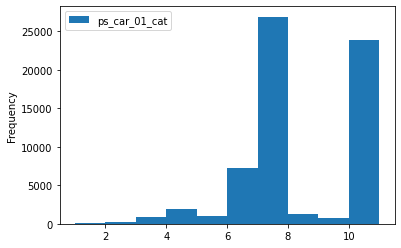

In [237]:
df[['ps_car_01_cat']].plot.hist()

<AxesSubplot:title={'center':'ps_reg_01 Analysis'}, ylabel='Length'>

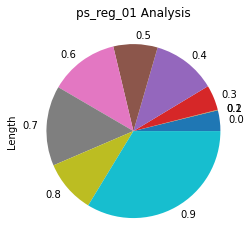

In [238]:
pm_frequency = get_frequency(df, 'ps_reg_01')
pm_frequency.set_index('category', inplace=True)

pm_frequency.Length.plot.pie(title = 'ps_reg_01 Analysis')

<AxesSubplot:title={'center':'ps_calc_13 Analysis'}, ylabel='Length'>

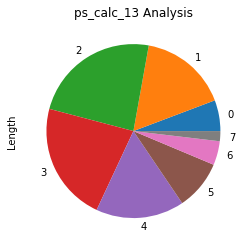

In [239]:
pm_frequency = get_frequency(df, 'ps_calc_13')
pm_frequency.set_index('category', inplace=True)

pm_frequency.Length.plot.pie(title = 'ps_calc_13 Analysis')

In [240]:
import plotly.express as px
fig = px.histogram(df, x = 'ps_reg_01')
fig.show()

In [241]:
fig = px.histogram(df, x = 'ps_reg_01')
fig.show()

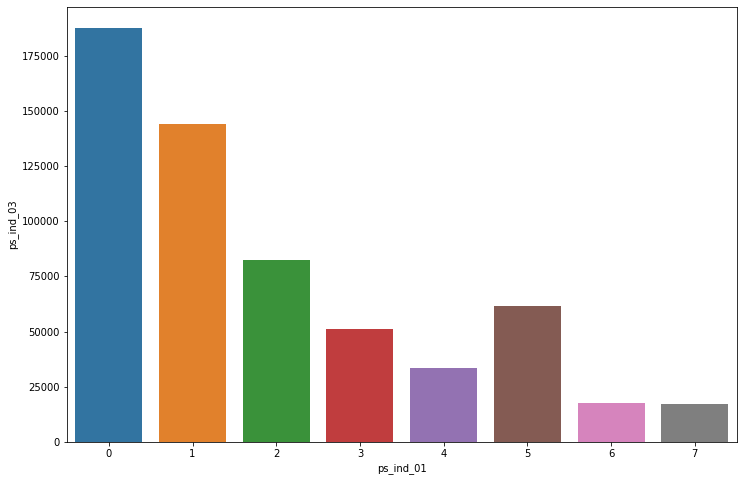

In [279]:
plt.figure(figsize=(12,8))

sns.countplot(data=df,x=df['ps_ind_01'])

plt.xlabel('ps_ind_01')
plt.ylabel('ps_ind_03')

plt.show()

In [ ]:
#Perform Correlation analysis  

<AxesSubplot:>

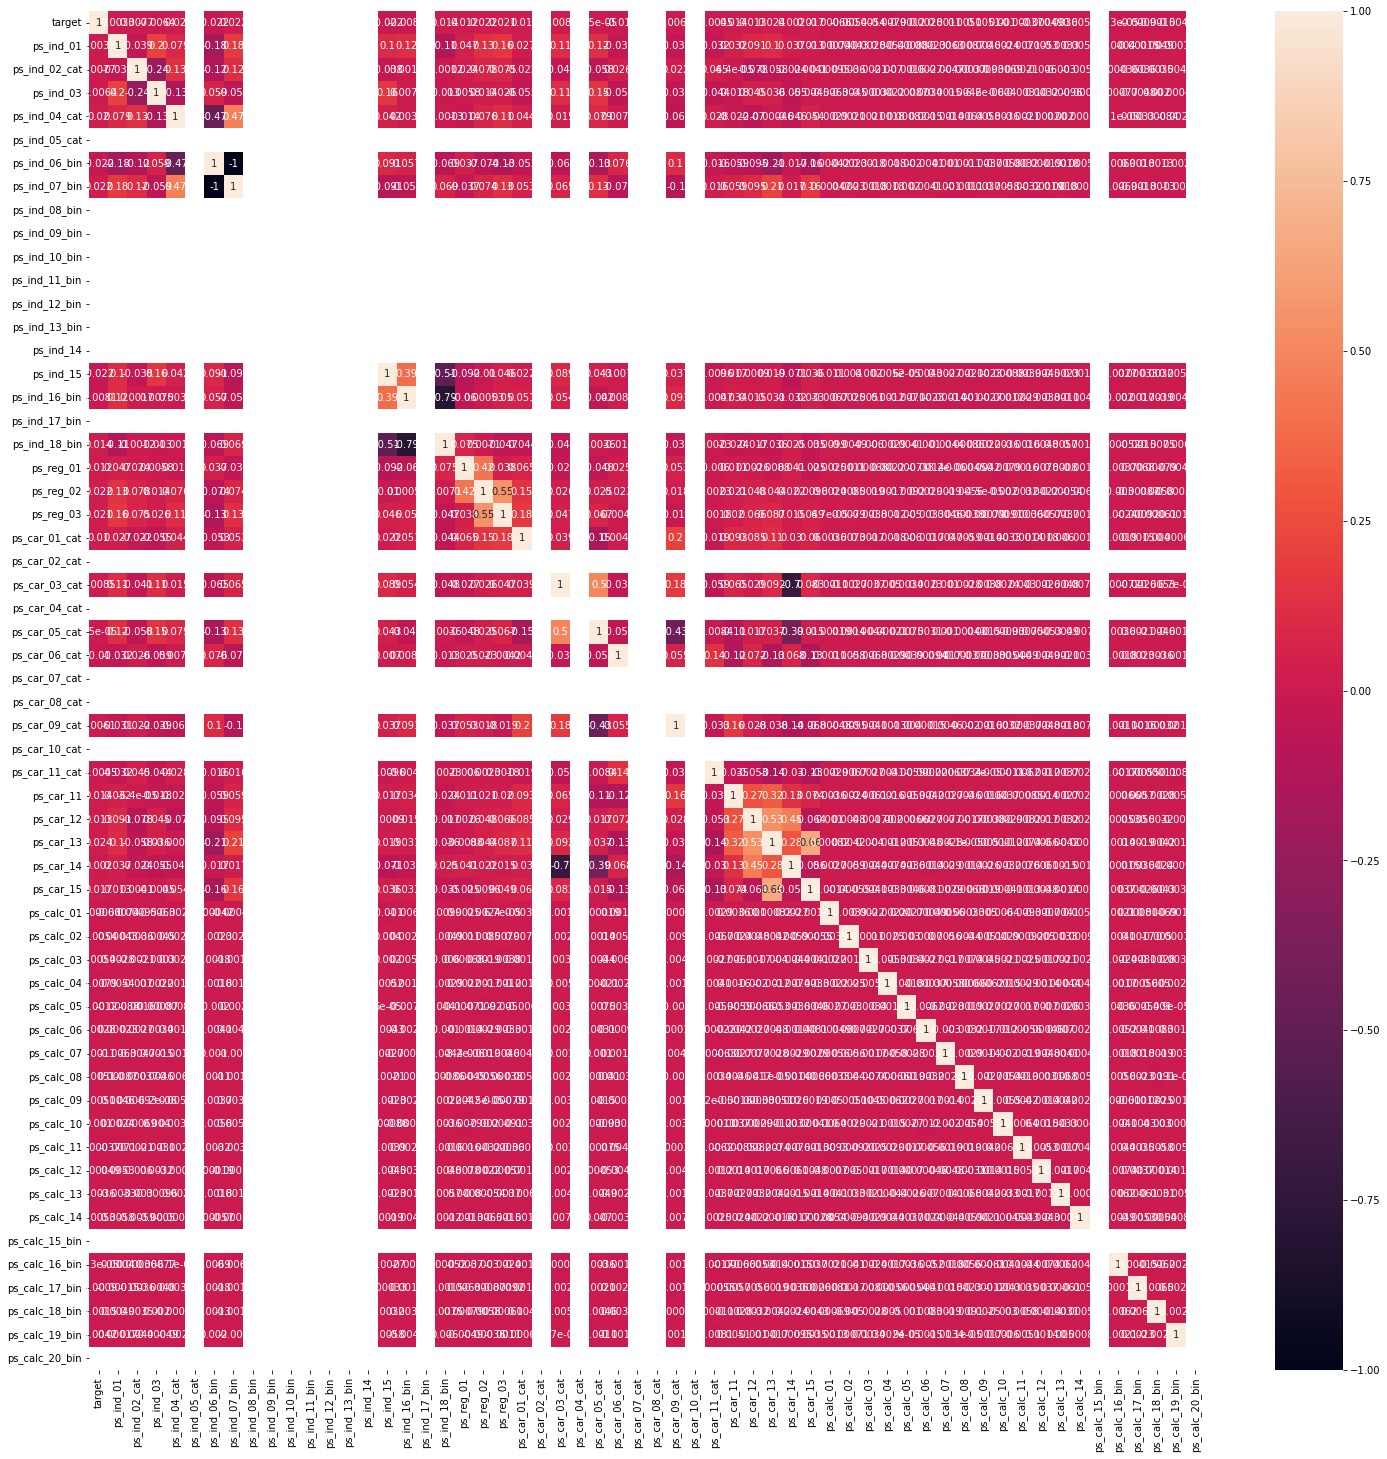

In [242]:
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(25,25))
sns.heatmap(df[top_features].corr(),annot=True)

In [ ]:
# To avoid imbalanced datasets part of depentdented variables 
# SMOTE()

In [279]:
pip install imblearn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------------------------------------ 235.6/235.6 kB 901.6 kB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 1.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [68]:
X = df.drop('target', axis='columns')
y = df['target']

In [20]:
y.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [69]:
#pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [22]:
y_sm.value_counts()

0    573518
1    573518
Name: target, dtype: int64

In [70]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,y_sm, test_size=0.2,random_state=15,stratify=y_sm)

In [24]:
y_train_sm.value_counts()

0    458814
1    458814
Name: target, dtype: int64

In [25]:
y_test_sm.value_counts()

0    114704
1    114704
Name: target, dtype: int64

In [26]:
# Model Creation

In [89]:
X = df.drop(['target'], axis=1)
Y=df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [247]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((51266, 57), (12817, 57), (51266,), (12817,))

In [28]:
model_logisticReg = LogisticRegression(random_state=9)

In [29]:
model_logisticReg.fit(X_train_sm,y_train_sm)

LogisticRegression(random_state=9)

In [30]:
pred_logisticReg=model_logisticReg.predict(X_test_sm)

In [361]:
print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test_sm,pred_logisticReg))

Accuracy for Random Forest on CV data:  0.8288493874609657


In [363]:
print(classification_report(y_test_sm,pred_logisticReg))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     12489
           1       0.84      0.82      0.83     12489

    accuracy                           0.83     24978
   macro avg       0.83      0.83      0.83     24978
weighted avg       0.83      0.83      0.83     24978



In [ ]:
Inference : The dataset is well fitted with the Logistic Regression Algorithm and its gives a excellent accuracy(ie 83%)

In [33]:
DecisionTreeClassifier = DecisionTreeClassifier(random_state=9)

In [34]:
DecisionTreeClassifier.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=9)

In [35]:
pred_Decsion_Tree_Classfire=DecisionTreeClassifier.predict(X_test_sm)

In [368]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test_sm,pred_Decsion_Tree_Classfire))

Accuracy for Random Forest on CV data:  0.9559212106653855


In [369]:
print(classification_report(y_test_sm,pred_Decsion_Tree_Classfire))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     12489
           1       0.94      0.97      0.96     12489

    accuracy                           0.96     24978
   macro avg       0.96      0.96      0.96     24978
weighted avg       0.96      0.96      0.96     24978



In [ ]:
Inference : The dataset is well fitted with the Decision Tree Algorithm and its gives a excellent accuracy( ie 96%)

In [36]:
model_randomForest=RandomForestClassifier(random_state=7)
model_randomForest.fit(X_train_sm,y_train_sm) 

RandomForestClassifier(random_state=7)

In [37]:
pred_random_forest=model_randomForest.predict(X_test_sm)

In [375]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test_sm,pred_random_forest))

Accuracy for Random Forest on CV data:  0.9850668588357755


In [376]:
print(classification_report(y_test_sm,pred_random_forest))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12489
           1       1.00      0.97      0.98     12489

    accuracy                           0.99     24978
   macro avg       0.99      0.99      0.99     24978
weighted avg       0.99      0.99      0.99     24978



In [ ]:
Inference : The dataset is well fitted with the Random Forest Algorithm and its gives a excellent accuracy( ie 99%)

In [10]:
model_SVC=LinearSVC(random_state=7)
model_SVC.fit(X_train_sm,y_train_sm)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=7)

In [11]:
pred_SVC=model_SVC.predict(X_test_sm)

In [12]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test_sm,pred_SVC))

Accuracy for Random Forest on CV data:  0.7180481936113824


In [14]:
print(classification_report(y_test_sm,pred_SVC))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72    114704
           1       0.73      0.69      0.71    114704

    accuracy                           0.72    229408
   macro avg       0.72      0.72      0.72    229408
weighted avg       0.72      0.72      0.72    229408



In [ ]:
Inference : The dataset is well fitted with the SVC Algorithm and its gives a excellent accuracy( ie 72%)

In [15]:
model_GBC=GradientBoostingClassifier(random_state=8)
model_GBC.fit(X_train_sm,y_train_sm)

GradientBoostingClassifier(random_state=8)

In [16]:
pred_GBC = model_GBC.predict(X_test_sm)

In [17]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test_sm,pred_GBC))

Accuracy for Random Forest on CV data:  0.966274061933324


In [ ]:
Inference : The dataset is well fitted with the Gradient Boosting Algorithm and its gives a excellent accuracy( ie 97%)

In [ ]:
Model Evaluation For Logistic Regression:

In [38]:
roc_lr=roc_auc_score(y_test_sm, pred_logisticReg)
acc_lr = accuracy_score(y_test_sm, pred_logisticReg)
prec_lr = precision_score(y_test_sm, pred_logisticReg)
rec_lr = recall_score(y_test_sm, pred_logisticReg)
f1_lr = f1_score(y_test_sm, pred_logisticReg)

In [ ]:
Model Evaluation For Logistic Regression:

In [39]:
roc_dt=roc_auc_score(y_test_sm, pred_Decsion_Tree_Classfire)
acc_dt = accuracy_score(y_test_sm, pred_Decsion_Tree_Classfire)
prec_dt = precision_score(y_test_sm, pred_Decsion_Tree_Classfire)
rec_dt = recall_score(y_test_sm, pred_Decsion_Tree_Classfire)
f1_dt = f1_score(y_test_sm, pred_Decsion_Tree_Classfire)

In [ ]:
Model Evaluation For Random Forest:

In [40]:
roc_rf=roc_auc_score(y_test_sm, pred_random_forest)
acc_rf = accuracy_score(y_test_sm, pred_random_forest)
prec_rf = precision_score(y_test_sm, pred_random_forest)
rec_rf = recall_score(y_test_sm, pred_random_forest)
f1_rf = f1_score(y_test_sm, pred_random_forest)

In [ ]:
Model Evaluation For LinearSVC :

In [41]:
roc_svc=roc_auc_score(y_test_sm, pred_SVC)
acc_svc = accuracy_score(y_test_sm, pred_SVC)
prec_svc = precision_score(y_test_sm, pred_SVC)
rec_svc = recall_score(y_test_sm, pred_SVC)
f1_svc = f1_score(y_test_sm, pred_SVC)

In [ ]:
Model Evaluation For Gradient Boosting:

In [42]:
roc_gb=roc_auc_score(y_test_sm, pred_GBC)
acc_gb = accuracy_score(y_test_sm, pred_GBC)
prec_gb = precision_score(y_test_sm, pred_GBC)
rec_gb = recall_score(y_test_sm, pred_GBC)
f1_gb = f1_score(y_test_sm, pred_GBC)

In [43]:
results = pd.DataFrame([['Logistic Regression',acc_lr,prec_lr,rec_lr,f1_lr,roc_lr],
                        ['Decision Tree Classifier', acc_dt,prec_dt,rec_dt,f1_dt,roc_dt],
                        ['Random Forest Classifier', acc_rf,prec_rf,rec_rf, f1_rf,roc_rf],
                        ['Linear SVC', acc_svc,prec_svc,rec_rf,f1_rf,roc_rf],
                        ['Gradient Boosting Classifier',acc_gb, prec_gb, rec_gb, f1_gb, roc_gb]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

Model  Accuracy  Precision    Recall  F1 Score  \
0           Logistic Regression  0.530919   0.526743  0.608994  0.564890   
1      Decision Tree Classifier  0.949004   0.941003  0.958075  0.949462   
2      Random Forest Classifier  0.979791   0.999066  0.960481  0.979394   
3                    Linear SVC  0.718048   0.728795  0.960481  0.979394   
4  Gradient Boosting Classifier  0.966274   0.993031  0.939139  0.965333   

        ROC  
0  0.530919  
1  0.949004  
2  0.979791  
3  0.979791  
4  0.966274

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import numpy as numpy

In [ ]:
print(tf.keras.__version__)

In [45]:
# Load the Tensorboard Notebook Extension

%load_ext tensorboard

In [46]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 28168), started 0:04:01 ago. (Use '!kill 28168' to kill it.)

In [ ]:
#Removed
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,y_sm, test_size=0.2,random_state=15,stratify=y_sm)

In [103]:
X_1 = df.drop(['target'], axis=1)
Y_1=df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [105]:
df.shape

(595212, 59)

In [109]:
X_1.shape, Y_1.shape

((595212, 58), (595212,))

In [79]:
y_train_sm = np.array(y_train_sm)
y_test_sm = np.array(y_test_sm)

In [93]:
Y = np.array(Y)
#y = np.array(y)

In [94]:
Y=Y.reshape(-1,1)
Y.shape

(595212, 1)

In [92]:
X.shape, Y.shape

((595212, 58), (595212,))

In [85]:
X_sm.shape,y_sm.shape

((1147036, 58), (1147036,))

In [ ]:
y_sm = np.array(y_sm)
y = np.array(y)

In [73]:
X_train_sm.shape, X_test_sm.shape

((917628, 58), (229408, 58))

In [74]:
y_train_sm.shape, y_test_sm.shape

((917628,), (229408,))

In [77]:
X_sm.shape, y_sm.shape

((1147036, 58), (1147036,))

In [80]:
y_train_sm=y_train_sm.reshape(-1, 1)
y_train_sm.shape

(917628, 1)

In [81]:
y_test_sm = y_test_sm.reshape(-1,1)
y_test_sm.shape

(229408, 1)

In [ ]:
y_train_sm = y_train_sm.reshape(-1,1)
y_train_sm.shape
#x = x.reshape(-1,1)
#x.shape

In [110]:
model1 = Sequential()

model1.add(Dense(1, input_shape=(58,), name='Dense1', activation = 'softmax'))

In [111]:
# Model Compiler

model1.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [112]:
# Model Training
log_dir = 'logs/fit/model1'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

training = model1.fit(X, Y, batch_size=64, epochs=100, validation_split=0.2, callbacks= tensorboard_callback)

Epoch 1/100
7441/7441 [==============================] - 8s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 2/100
7441/7441 [==============================] - 7s 991us/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 3/100
7441/7441 [==============================] - 8s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 4/100
7441/7441 [==============================] - 9s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 5/100
7441/7441 [==============================] - 9s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 6/100
7441/7441 [==============================] - 9s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 7/100
7441/7441 [==============================] - 9s 1ms/step - loss: 0.0

7441/7441 [==============================] - 9s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 55/100
7441/7441 [==============================] - 10s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 56/100
7441/7441 [==============================] - 9s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 57/100
7441/7441 [==============================] - 9s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 58/100
7441/7441 [==============================] - 9s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 59/100
7441/7441 [==============================] - 9s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 60/100
7441/7441 [==============================] - 9s 1ms/step - loss: 0.0000e+00

In [99]:
X.shape, Y.shape

((595212, 58), (595212, 1))

In [108]:
# Model Training
log_dir = 'logs/fit/model1'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

training = model1.fit(X_1, Y_1, batch_size=64, epochs=100, validation_split=0.2, callbacks= tensorboard_callback)

Epoch 1/100
7441/7441 [==============================] - 9s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 2/100
7441/7441 [==============================] - 7s 966us/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 3/100
7441/7441 [==============================] - 8s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 4/100
7441/7441 [==============================] - 9s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 5/100
7441/7441 [==============================] - 10s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 6/100
7441/7441 [==============================] - 10s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0364 - val_loss: 0.0000e+00 - val_accuracy: 0.0366
Epoch 7/100
7441/7441 [==============================] - 10s 1ms/step - loss: 

In [ ]:
Inferences - After comparing the Neural network model with traditional models.Traditional models are showing the better 
performance.

In [ ]:
MLP Classifier:

In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [114]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
logistic_model = LogisticRegression(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
models = [mlp_model, logistic_model, svm_model, rf_model]
model_names = ['MLP', 'Logistic Regression', 'SVM', 'Random Forest']

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X, y, cv=5)  # Perform 5-fold cross-validation
    print(f"{name} Accuracy: {np.mean(scores):.2f} (±{np.std(scores):.2f})")


MLP Accuracy: 0.96 (±0.00)
Logistic Regression Accuracy: 0.96 (±0.00)


In [ ]:
import pickle 

filename = 'final_model.sav'
pickle.dump(rfc1, open(filename, 'wb'))
 

In [ ]:
bin - 17, cat- 14 , ct/ordinal-26

In [11]:
df.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      

In [8]:
df.head()

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0       0          2              2          5              1              0   
1       0          1              1          7              0              0   
2       0          5              4          9              1              0   
3       0          0              1          2              0              0   
4       0          0              2          0              1              0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ...  \
0              0              1              0              0  ...   
1              0              0              1              0  ...   
2              0              0              1              0  ...   
3              1              0              0              0  ...   
4              1              0              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 58 columns]

In [ ]:
Tasks to be performed:
    Following  are  the  deliverables  (.ipynb  files),  which  needed  to  be  developed  with  respect  to Exploratory Data Analysis:
        1. Write at least 3 important inferences from the data above 
                a.target value decides whether the owner will initiate an auto insurance claim in the next year.
                b.Majority of the data are continuous/ordinal than the categorical, binary type.
                c.Owner will filed the car insurance depends on the continuous/ordinal , categorical, binary features values.
            
        2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion? 
               No, target feature is imbalanced. SMOTE technique applied to balance the dataset.
        3. How many categorical features are there?  
                14
        4. How many binary features are there?   
                17
        5. Write inferences from data on interval variables. 
                All models Inferences are recoded above.
        
        6. Write inferences from data on ordinal variables. 
               All models Inferences are recoded above.
        
        7. Write inferences from data on binary variables.
            All models Inferences are recoded above.
        
        8.Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance 
                No, target feature is imbalanced. 
                
        9. What should be the preferred way in this case to balance the data? 
                SMOTE technique applied to balance the dataset.
        10. How many training records are there after achieving a balance of 12%? 
        
        11. Which are the top two features in terms of missing values?  
                There is no missing values found
        12. In total,how many features have missing values?  
                0 values.
        13. What steps should be taken to handle the missing data? 
                If there any missing values found the dataset that all that missing values should be filled with mean, 
            median or mode.
        
        14. Which interval variables have strong correlation? 
                All models Performance matrix recoded above.
        
        15. What's the level of correlation among ordinal features?  
               All models Performance matrix recoded above.
        
        16.  Implement Hot Encoding for categorical features
                As the features are represented as categorical.But the datatyes of the relevent type is float/int.
        
        17.  In nominal and interval features,which features are suitable for StandardScaler? 
                 both variables are eligble for StandardScaler.
        
        18.  Summarize the learnings of ED   
            All models Inferences are recoded above.

In [ ]:
Following  are  the  deliverables  (.ipynb  files),  which  needed  to  be  developed  with  respect  to 
Modeling :
    
    1. The Simple LogisticRegression Model seemsto have high accuracy. Is that what we need at all? What is the problem with this model? 
        LogisticRegression has less accuracy and f1 score compare to other models.
        
    2. Why do you think f1-score is 0.0? 
        If the F1 score is 0.0, it means that the model is not able to correctly identify any positive instances (true positives) from 
        the dataset, leading to both precision and recall being 0. This could happen for several reasons,
        1.Poor model training
        2.Imbalanced dataset
        3.Data quality issues
        4.Inappropriate evaluation method
        
    3. What is the precision and recall score for the model? 
        All models Performance matrix recoded above.
        
    4. What is the most important inference you can draw from the result?
    
    5. What is the accuracy score and f1-score for the improved Logistic Regression model? 
        All models Performance matrix recoded above.
        
    6. Why do you think f1-score has improved?
        f1-score is improved after balance the dataset.
        
    7.  For  model  LinearSVC  play  with  parameters –dual,  max_iter  and  see  if  there  is  any improvement 
        All models Performance matrix recoded above.
    
    8.  SVC with  Imbalance  Check  &  Feature  Optimization  &  only  100K  Records→is  there improvement in scores? 
        All models Performance matrix recoded above.
    
    9.  XGBoostis  one  the  better  classifiers --but  still  f1-score  is  very  low.  What  could  be  the reason? 
        All models Performance matrix recoded above.XGBoost have good performance matrix.
    
    10. What is the increase in number of features after one-hotencoding of the data? 
        Its will increase depends on the class of the features.
                
    11. Is there any improvement in scores after encoding? 
        Yes, encoding helps to improve the scores.
    
    12.  If not missing a positive sample is the priority which model is best so far? 
            All models Performance matrix recoded above.
    
    13.  If not marking negative sample as positive is top priority, which model is best so far? 
            All models Performance matrix recoded above.
    
    14.  Do you think using AdaBoost can give any significant improvement over XGBoost? 
            I believe, XGBoost will give better evaluation matrix than AdaBoost.
    
    15.  MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size?
            All models Performance matrix recoded above.
    
    16.  At what layer size we get the best f1-score?
            All models Performance matrix recoded above.